# Practica 1

1. **Buscar un dataset de series temporales** (real) en alguna fuente pública (Kaggle, datos abiertos, etc.) o usar uno proporcionado por el profesor.
2. **Cargar el dataset** en un DataFrame con `parse_dates` y `index_col` (o convertir la columna de fecha a `datetime`).
3. **Explorar**:
   - Dimensiones, tipos de datos (`.info()`, `.dtypes`).
   - Estadísticas descriptivas (`.describe()`).
4. **Visualizar** la columna principal (o columnas) en un gráfico de líneas.
5. **Interpretar** si hay tendencia o estacionalidad aparente.
6. **(Opcional)** Aplicar descomposición estacional y comentar los hallazgos.
7. **(Opcional)** Hacer un resampleo diario, semanal o mensual para comparar.




1. **Buscar un dataset de series temporales** (real) en alguna fuente pública (Kaggle, datos abiertos, etc.) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Read the CSV file
file = pd.read_csv("90_day_habit_tracker.csv")

# View the first 5 rows
file.head()

,Date,Sleep_Hours,Workout_Duration_Min,Journaling (Y/N),Reading_Min,Screen_Time_Hours,Daily_Expense (RM),Mood_Score (1-10)
0,2024-03-01,7.7,45,Y,7,3.9,27.22,9
1,2024-03-02,7.8,45,Y,49,7.1,16.88,4
2,2024-03-03,5.9,0,Y,20,7.9,22.21,7
3,2024-03-04,6.4,0,Y,11,4.7,36.31,4
4,2024-03-05,7.6,60,Y,35,3.8,12.07,9


2. **Cargar el dataset** en un DataFrame con `parse_dates` y `index_col` (o convertir la columna de fecha a `datetime`).

In [2]:
file['Date'] = pd.to_datetime(file['Date'])
df=file.set_index(['Date'])
df

,Sleep_Hours,Workout_Duration_Min,Journaling (Y/N),Reading_Min,Screen_Time_Hours,Daily_Expense (RM),Mood_Score (1-10)
Date,,,,,,,
2024-03-01,7.7,45,Y,7,3.9,27.22,9
2024-03-02,7.8,45,Y,49,7.1,16.88,4
2024-03-03,5.9,0,Y,20,7.9,22.21,7
2024-03-04,6.4,0,Y,11,4.7,36.31,4
2024-03-05,7.6,60,Y,35,3.8,12.07,9
...,...,...,...,...,...,...,...
2024-05-25,7.7,0,N,2,6.3,41.11,10
2024-05-26,8.5,45,N,7,5.1,14.70,10
2024-05-27,8.5,15,N,33,8.0,10.23,9


3. **Explorar**:
   - Dimensiones, tipos de datos (`.info()`, `.dtypes`).
   - Estadísticas descriptivas (`.describe()`).

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  90 non-null     datetime64[ns]
 1   Sleep_Hours           90 non-null     float64       
 2   Workout_Duration_Min  90 non-null     int64         
 3   Journaling (Y/N)      90 non-null     object        
 4   Reading_Min           90 non-null     int64         
 5   Screen_Time_Hours     90 non-null     float64       
 6   Daily_Expense (RM)    90 non-null     float64       
 7   Mood_Score (1-10)     90 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 5.8+ KB


In [4]:
df.describe()

,Sleep_Hours,Workout_Duration_Min,Reading_Min,Screen_Time_Hours,Daily_Expense (RM),Mood_Score (1-10)
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,7.022222,30.333333,29.522222,5.496667,25.857111,7.433333
std,0.935898,21.682075,18.154287,1.428321,13.160525,2.077434
min,4.700000,0.000000,0.000000,3.100000,0.980000,4.000000
25%,6.425000,15.000000,14.250000,4.500000,16.090000,5.250000
50%,7.150000,30.000000,27.500000,5.600000,26.045000,8.000000
75%,7.700000,45.000000,46.500000,6.600000,37.157500,9.000000
max,9.400000,60.000000,60.000000,8.000000,49.960000,10.000000


In [5]:
import funciones_auxiliares

outliers_por_col = funciones_auxiliares.contar_outliers_iqr(df)
print(outliers_por_col)
print(f"Total de outliers: {outliers_por_col.sum()}")

Sleep_Hours             0
Workout_Duration_Min    0
Reading_Min             0
Screen_Time_Hours       0
Daily_Expense (RM)      0
Mood_Score (1-10)       0
dtype: int64
Total de outliers: 0


In [28]:
df.select_dtypes(include=['number']).std()

Sleep_Hours              0.935898
Workout_Duration_Min    21.682075
Reading_Min             18.154287
Screen_Time_Hours        1.428321
Daily_Expense (RM)      13.160525
Mood_Score (1-10)        2.077434
dtype: float64

In [29]:
df.select_dtypes(include=['number']).kurtosis()

Sleep_Hours            -0.158069
Workout_Duration_Min   -1.366764
Reading_Min            -1.297115
Screen_Time_Hours      -1.065240
Daily_Expense (RM)     -0.993982
Mood_Score (1-10)      -1.269242
dtype: float64

In [30]:
df["Journaling (Y/N)"][df["Journaling (Y/N)"]=="Y"].count()

43

### Descripción de las variables

La base de datos recopiló datos de 90 días acerca de los hábitos diarios y el estado de ánimo. La base posee 90 observaciones y 7 variables explicadas a continuación:

1. Sueño (Sleep_Hours)

- En promedio, se durmió unas 7 horas por noche con una desviación de 1 hora ($\bar{x} = 7. 02 $, $sd = 0. 93$). Valores similares a las recomendaciones de la OMS para adultos.
- La variacion del sueño estuvo entre 4.7 a 9.4 horas. Por lo que hubo ocasiones en las que el sueño fue insuficiente.
- La distribución es mas o menos simétrica (kurtosis cerca de 0, $-0. 15$), y sin valores atípicos. Muestra que el descanso fue bastante estable.

2. Actividad física (Workout_Duration_Min)

- Se registró, en promedio, 30 minutos de ejercicio al día ($sd = 21. 68$). Cumple con la recomendación de la OMS, esa de 150 minutos semanales.
- Aunque la dispersión fue alta, algunos días nada de ejercicio (mínimo = 0), y otros, hasta 60 minutos, esto puede ser debido a días de descanso en la rutina de ejercicios.
- La distribución posee un a baja concentración (kurtosis = $-1. 36$).

3. Lectura (Reading_Min)

- En promedio, se leyó por 30 minutos al día, variando entre 0 a 60 minutos  por lo que no se dedicó a la lectura de forma constante, sino que alternó entre días de mucho tiempo y otros sin lectura como se aprecia en la desviación ($sd = 18. 15$) elevada para los valores observados.
- Parece plana ($kurtosis = -1. 29$) reforzando la idea de que no hubo un tiempo dedicado de forma constante.

4. Uso de pantallas (Screen_Time_Hours)

- La media de uso fue 5.5 horas diarias con la pantalla, con un rango entre 3.1 y 8 horas.
- La variabilidad es relativa considerando los valores de la variable ($sd = 1. 43$), lo que indica que suele usar de manera casi constante las pantallas como refuerza la kurtosis ($kurtosis = -1. 06$), además no hubo valores outliers.

5. Gasto diario (Daily_Expense)

- Un promedio de gasto de 25.9 RM cada día, con mucha variabilidad ($sd = 13. 16$).
- Los gastos poseen un rango de entre 0. 98 a 49. 96 RM, esto podría ser debido a gastos en fines de semana respecto a los días laborables o gastos excepcionales.
- Ausencia de valores outliers sugiere que aunque el espectro es grande los valores se quedan dentro de límites que son aceptables y no se ha realizado compras en grandes cantidades o imprevistos importantes.

6. Estado de ánimo (Mood_Score)
- El promedio del puntaje del ánimo es de 7.4 sobre 10 teniendo un rango entre 4 y 10.
- La dispersión se relativamente moderada $sd = 2.07$, demostrando que el estado emocional presenta cambios considerables, aunque mayormenete en zona positiva $>5$ con un casi 75% de los datos $Q1=5.25$.
- La distribución es más bien plana $kurtosis = -1.27$, esto revela que los valores se suelen distribuir con mayor homogeneidad, sin mucha aglomeración cerca a la media.

7. Jornada laboral (Journaling (Y/N))
- Las clases estan balanceadas siendo 47 N y 43 Y estos valores son inusuales ya que teniendo en cuenta las fechas (marzo a junio de 2024) lo habitual sería que tuviera una mayor proporción de Y, una posibilidad es que haga trabajos de guardias como bomberos los cuales no siguen una jornada fija de 5 dias trabajando y 2 descansando, otra posibilidad sería que este periodo le coincideio con sus vacaciones.

En general, los resultados señalan a una persona con costumbres relativamente estables y saludables: mantiene un patrón de sueño decente, hace ejercicio y lee un poco, y manifiesta un ánimo mayormente positivo.

4. **Visualizar** la columna principal (o columnas) en un gráfico de líneas.

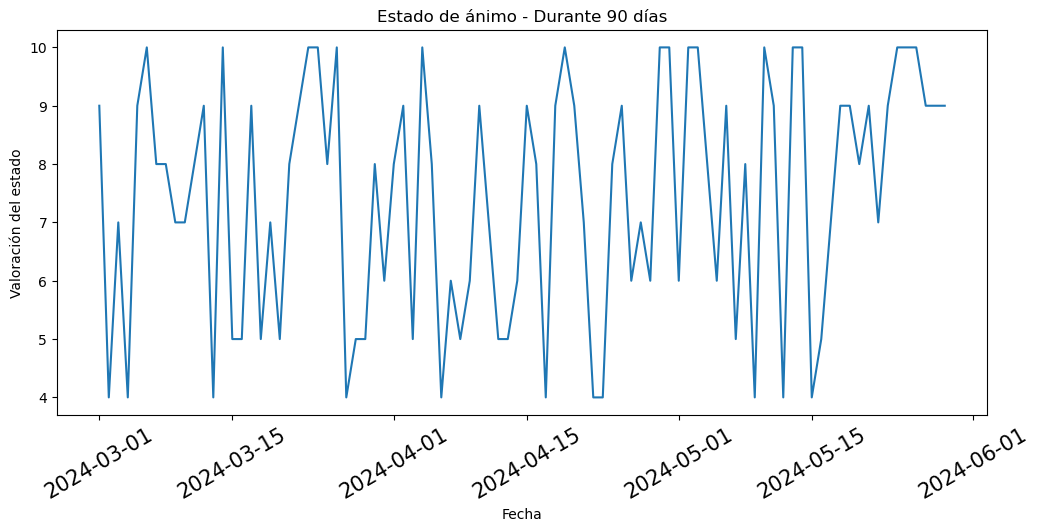

In [31]:
plt.figure(figsize=(12, 5))
plt.plot(df['Mood_Score (1-10)'], label='Estado de ánimo')
plt.title('Estado de ánimo - Durante 90 días')
plt.xlabel('Fecha')
plt.ylabel('Valoración del estado')
plt.xticks(rotation=30, fontsize=15)


plt.show()

5. **Interpretar** si hay tendencia o estacionalidad aparente.

**<u>Interpretación resultados</u>.-**

La grafica refleja las puntuaciones del estado de ánimo, a lo largo de 90 días, de marzo a junio de 2024. La gráfica muestra grandes oscilaciones.

Para realizar el análisis de la serie temporal se descompondrá en **tendencia, estacionalidad, ciclos y componente irregular**, ya que cada uno aporta información distinta sobre el comportamiento de los datos.  

- Tendencia: no se aprecia una tendencia.

- Estacionalidad: no se aprecia patrones firmes, ya sean semanales o mensuales. Pero se aprecia que los picos notables (9-10) se repiten cada 10-15 días más o menos, al igual que bajadas a 4-5.

- Ciclos: se aprecia cambios amplios e irregulares (por ejemplo, bajadas en abril, seguidas por subidas a principios de mayo), quiza relacionado con rutinas varias o turnos de trabajo.

- Componente irregular: hay cambios repentinos, como caídas rápidas de 9 a 5. Una buena parte de la inestabilidad parece estar conectada a hábitos diarios o factores externos.

Se procederá a realizar la descomposición para intentar observar alguna tendencia, estacionalidad ...

6. **(Opcional)** Aplicar descomposición estacional y comentar los hallazgos.

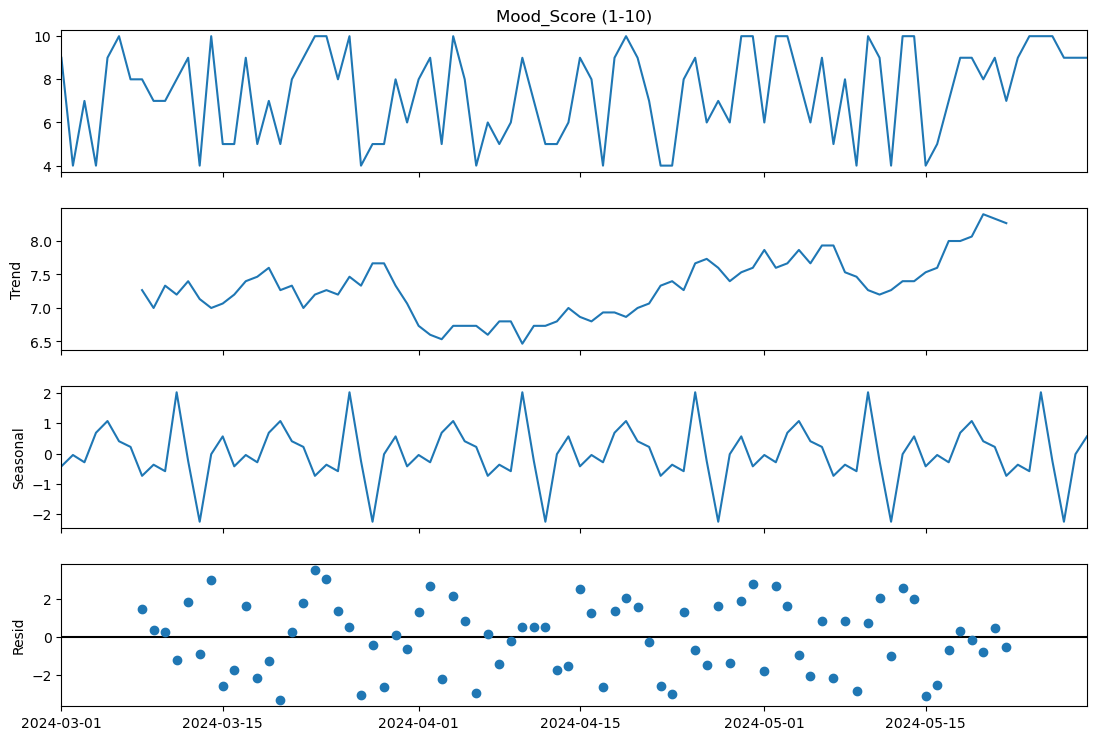

In [32]:
# Para series diarias con estacionalidad quincenal, establecemos period ~ 15  
decomposition = sm.tsa.seasonal_decompose(df['Mood_Score (1-10)'], model='additive', period=15)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

**<u>Interpretación resultados</u>.-**

Para la descomposición se ha utilizado el modelo aditivo y el perido quincenal ya que son con los que se ha observado una mejor explicatividad de la serie.

- Serie observada (Mood_Score)

La serie original como ya se ha cometado refleja una alta volatilidad diaria, con oscilaciones rápidas entre valores bajos (~5) y máximos (~10).

- Tendencia (Trend)

Se observa dos tendencias, primero con una tendencia relativamente constante durante las dos primeras semanas para descender durante unos pocos días y segundo de una subida hasta el final de la serie con una ligera caida pero recuperandolo en pocos dias.

- Estacionalidad (Seasonal)

El componente estacional muestra un patrón cíclico repetitivo con frecuencia aproximada de 15 días, acorde al parámetro definido en la descomposición.

En este ciclo, se alternan fases de ánimo más alto seguidas de descensos claros, lo que podría corresponder a ritmos quincenales (como por ejemplo: rutinas laborales, carga académica, períodos de descanso).

La amplitud de la estacionalidad (~2 puntos arriba/abajo respecto a la media) indica que estos ciclos tienen un peso considerable en la variación del ánimo.

- Residuos (Residual/Irregular)

Los residuos muestran picos abruptos e impredecibles, positivos y negativos, que no son explicados ni por la tendencia ni por la estacionalidad.

Su magnitud moderada indica que el modelo aditivo captura gran parte de la estructura, pero todavía queda un componente aleatorio importante, posiblemente asociado a eventos no recogidos por la variable (ej. circunstancias personales, sociales o imprevistos).

7. **(Opcional)** Hacer un resampleo diario, semanal o mensual para comparar.

El resampleo en series temporales implica modificar la frecuencia de los datos para examinarlos en intervalos diferntes a los originales.

Puede ser Downsampling, o sea, disminuir la unidad temporal, como de días a horas, por lo que se necesita llenar los valores que faltan.

O bien Upsampling, aumentando la unidad temporal, ya sea desde días a semanas o meses, generalmente a usando la media (como será en este caso), suma, el máximo...

Este método resulta útil para ajustar los datos al horizonte de análisis, reducir ruido, identificar patrones a más largo plazo o comparar variables que en su inicio poseen distintas frecuencias de registro.

En este caso se irá haciendo Upsampling empezando desde días a semanas luego a meses ect hasta que se observe que el aálisis no tiene sentido.

## SEMANAL

In [33]:
df_reducido=df["Mood_Score (1-10)"]
df_weekly = df_reducido.resample('W').mean()  # 'W' indica resample semanal
df_weekly.head()

Date
2024-03-03    6.666667
2024-03-10    7.571429
2024-03-17    7.142857
2024-03-24    7.714286
2024-03-31    6.571429
Freq: W-SUN, Name: Mood_Score (1-10), dtype: float64

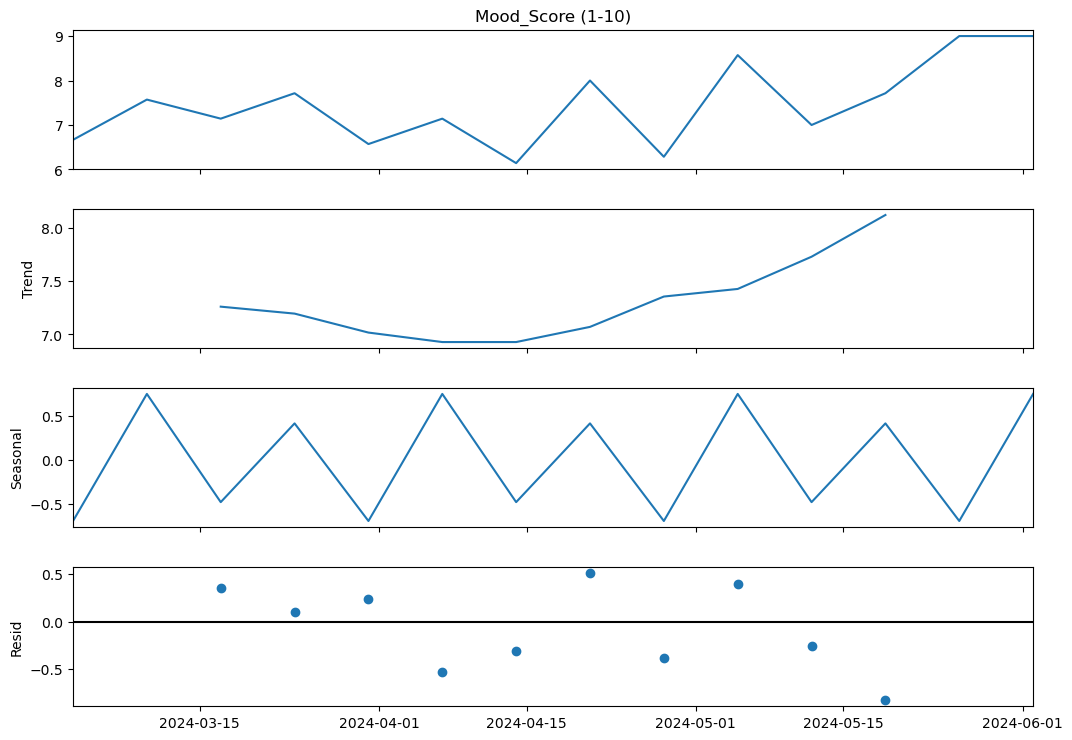

In [34]:
# Para series diarias con mensual, establecemos period ~ 4  ya que son 4 semanas  
decomposition_weekly = sm.tsa.seasonal_decompose(df_weekly, model='additive', period=4)

fig = decomposition_weekly.plot()
fig.set_size_inches(12, 8)
plt.show()

Después de cambiar de un muestreo diario a uno semanal, la serie se vuelve más suave (con pequeñas oscilaciones entre 6 y 8), lo que ayuda a reducir el ruido. La descomposición aditiva con un periodo de 4 que captura ciclos mensuales débiles.

- Serie observada (Mood_Score)

La serie es estable semanalmente, con baja volatilidad en comparación con la diaria.
- Tendencia (Trend)

Suave, alrededor de 7 a 7.5; se nota un ligero descenso en abril, seguido de un aumento sostenido en mayo y junio.
- Estacionalidad (Seasonal)

Oscilaciones de ±0.5  se obserba un patrón cada 4 semanas.
- Residuos (Residual/Irregular)

Ruido mínimo (~0, con pocos valores atípicos <±0.5)lo que indica una gran reducción respecto a  la diaria.

## Mensual

In [35]:
df_month = df_reducido.resample('ME').mean()  
df_month.head()

Date
2024-03-31    7.193548
2024-04-30    7.100000
2024-05-31    8.034483
Freq: ME, Name: Mood_Score (1-10), dtype: float64

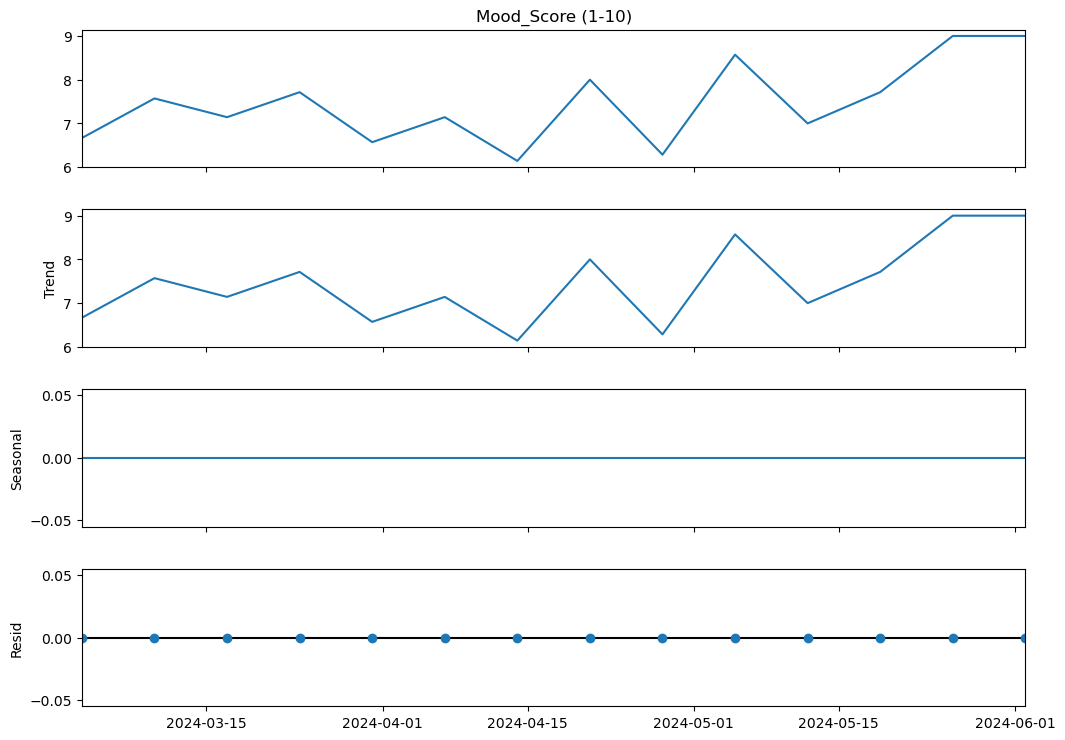

In [36]:
# Para series diarias con estacionalidad mensual, establecemos period ~ 30   
decomposition_month = sm.tsa.seasonal_decompose(df_weekly, model='additive', period=1)

fig = decomposition_month.plot()
fig.set_size_inches(12, 8)
plt.show()

Como se aprecia en la gráfica es ineficaz realizar un estudio con resampleo mensual o superior debido a que solo hay 90 observaciones

## Segunda base de datos ( Air Quality)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Read the CSV file
file = pd.read_csv("ancona_data.csv")

file['Date'] = pd.to_datetime(file['Date'])
file=file.set_index(['Date'])

file.head()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,code,id
Date,,,,,,,,,,,,,,,,,,
2021-09-01 01:00:00,7.000000,53.000000,15.000000,4.000000,43.612386,13.510830,Ancona Citadella,-0.528286,-0.987673,63.563788,66.476667,0.0,3.184390,2.847654,66.075624,85.422435,IT1827A,26
2021-09-01 01:00:00,8.000000,NaN,9.000000,NaN,43.527982,13.246672,Jesi,-0.529657,-0.987282,64.894507,67.803820,0.0,3.179204,2.851910,67.392994,85.502078,IT0460A,23
2021-09-01 01:00:00,9.035176,49.232338,10.681684,7.700312,43.450000,13.250000,Ancona CAMS Station 11,-0.529798,-0.987225,65.123477,68.032686,0.0,3.176792,2.852830,67.622493,85.500013,ANCCAMS11,39
2021-09-01 01:00:00,10.292098,51.336113,10.310384,6.732396,43.550000,13.450000,Ancona CAMS Station 8,-0.528619,-0.987565,63.943511,66.855648,0.0,3.181947,2.849007,66.453195,85.435906,ANCCAMS08,36
2021-09-01 01:00:00,8.348963,39.351303,10.273862,7.066792,43.550000,13.150000,Ancona CAMS Station 5,-0.530069,-0.987179,65.208544,68.116622,0.0,3.179280,2.852743,67.701531,85.534001,ANCCAMS05,33


In [38]:
file = file.dropna()

In [8]:
from funciones_auxiliares import cambio_temp
file = cambio_temp(file, "Dewpoint Temp")
file = cambio_temp(file, "Soil Temp")
file = cambio_temp(file, "Temp")

La variable Dewpoint Temp se ha convertido existosamente
La variable Soil Temp se ha convertido existosamente
La variable Temp se ha convertido existosamente


In [40]:
file.head()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,code,id
Date,,,,,,,,,,,,,,,,,,
2021-09-01 01:00:00,7.000000,53.000000,15.000000,4.000000,43.612386,13.51083,Ancona Citadella,-0.528286,-0.987673,17.535438,19.153704,0.0,3.184390,2.847654,18.930902,85.422435,IT1827A,26
2021-09-01 01:00:00,9.035176,49.232338,10.681684,7.700312,43.450000,13.25000,Ancona CAMS Station 11,-0.529798,-0.987225,18.401932,20.018159,0.0,3.176792,2.852830,19.790274,85.500013,ANCCAMS11,39
2021-09-01 01:00:00,10.292098,51.336113,10.310384,6.732396,43.550000,13.45000,Ancona CAMS Station 8,-0.528619,-0.987565,17.746395,19.364249,0.0,3.181947,2.849007,19.140664,85.435906,ANCCAMS08,36
2021-09-01 01:00:00,8.348963,39.351303,10.273862,7.066792,43.550000,13.15000,Ancona CAMS Station 5,-0.530069,-0.987179,18.449191,20.064790,0.0,3.179280,2.852743,19.834184,85.534001,ANCCAMS05,33
2021-09-01 01:00:00,9.253618,57.373196,9.802318,6.018585,43.550000,13.55000,Ancona CAMS Station 9,-0.528127,-0.987702,17.488763,19.107385,0.0,3.183379,2.847571,18.885997,85.404336,ANCCAMS09,37


In [41]:
file.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 356075 entries, 2021-09-01 01:00:00 to 2023-10-31 23:00:00
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   NO2                  356075 non-null  float64
 1   O3                   356075 non-null  float64
 2   PM10                 356075 non-null  float64
 3   PM2.5                356075 non-null  float64
 4   Latitude             356075 non-null  float64
 5   Longitude            356075 non-null  float64
 6   station_name         356075 non-null  object 
 7   Wind-Speed (U)       356075 non-null  float64
 8   Wind-Speed (V)       356075 non-null  float64
 9   Dewpoint Temp        356075 non-null  float64
 10  Soil Temp            356075 non-null  float64
 11  Total Percipitation  356075 non-null  float64
 12  Vegitation (High)    356075 non-null  float64
 13  Vegitation (Low)     356075 non-null  float64
 14  Temp                 356075 non-nu

In [42]:
import funciones_auxiliares

outliers_por_col = funciones_auxiliares.contar_outliers_iqr(file)
print(outliers_por_col)
print(f"Total de outliers: {outliers_por_col.sum()}")

NO2                    17763
O3                       462
PM10                   13199
PM2.5                  14773
Latitude                   0
Longitude                  0
Wind-Speed (U)          4733
Wind-Speed (V)           800
Dewpoint Temp          70826
Soil Temp              64070
Total Percipitation    65211
Vegitation (High)          0
Vegitation (Low)           0
Temp                   64868
Relative Humidity        202
id                         0
dtype: int64
Total de outliers: 316907


(array([ 21454.,  42772.,  16514.,   1100.,   7163.,  68108., 130056.,
         82623.,  39838.,   7998.]),
 array([-12.16147906,  -7.81091603,  -3.460353  ,   0.89021003,
          5.24077306,   9.59133609,  13.94189912,  18.29246215,
         22.64302518,  26.99358821,  31.34415124]),
 <BarContainer object of 10 artists>)

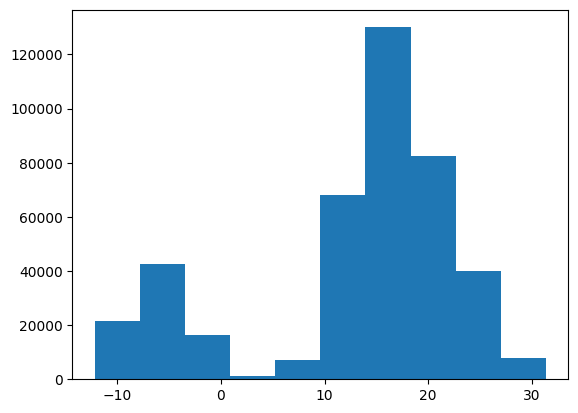

In [9]:
import matplotlib.pyplot as plt
plt.hist(file["Temp"])

Pese a la aparición de `outliers` utilizando el rango intercuantílico, el dato por su semántica no representa un valor atípico como se puede apreciar en la grafica superior, por lo que no se procesarán como tales y se entenderan que son valores normales.

In [44]:
file.describe()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,id
count,356075.000000,356075.000000,356075.000000,356075.000000,356075.000000,356075.000000,356075.000000,356075.000000,356075.000000,356075.000000,3.560750e+05,356075.000000,356075.000000,356075.000000,356075.000000,356075.000000
mean,11.829988,57.879002,18.605739,12.946574,43.562854,13.365402,-0.114487,-0.204526,10.026574,12.863813,1.648907e-03,3.058195,2.776807,12.816332,75.393728,32.944750
std,8.579240,25.388087,10.072996,7.646200,0.077606,0.133604,0.888256,0.955539,9.950154,10.127788,4.948630e-03,0.247628,0.147116,10.149792,18.510034,5.696021
min,0.000000,0.000000,0.000000,0.000000,43.450000,13.150000,-3.877032,-3.671453,-13.126791,-11.084569,-6.940000e-18,2.718726,2.573985,-12.161479,12.943158,22.000000
25%,6.023852,39.696693,11.851581,7.872717,43.450000,13.250000,-0.736225,-0.996539,9.277081,11.054388,2.363346e-07,2.810523,2.628602,11.010212,62.407739,28.000000
50%,9.748419,57.220460,16.322624,11.175761,43.550000,13.350000,-0.370609,-0.361224,13.849422,15.371898,1.266766e-05,3.054193,2.774937,15.588829,80.013664,33.000000
75%,15.000000,75.129325,23.007828,16.057899,43.650000,13.450000,0.452912,0.527839,16.738565,19.349146,6.119133e-04,3.269721,2.901801,19.375884,90.923646,38.000000
max,285.000000,162.000000,249.000000,200.000000,43.650000,13.550000,3.617407,4.307326,22.777663,32.262848,7.496383e-02,3.470822,3.022056,31.344151,99.996023,42.000000


In [45]:
file.select_dtypes(include=['number']).std()

NO2                     8.579240
O3                     25.388087
PM10                   10.072996
PM2.5                   7.646200
Latitude                0.077606
Longitude               0.133604
Wind-Speed (U)          0.888256
Wind-Speed (V)          0.955539
Dewpoint Temp           9.950154
Soil Temp              10.127788
Total Percipitation     0.004949
Vegitation (High)       0.247628
Vegitation (Low)        0.147116
Temp                   10.149792
Relative Humidity      18.510034
id                      5.696021
dtype: float64

In [46]:
file.select_dtypes(include=['number']).kurtosis()

NO2                    11.989846
O3                     -0.443822
PM10                   15.146602
PM2.5                  17.886213
Latitude               -1.330481
Longitude              -1.126192
Wind-Speed (U)          0.444445
Wind-Speed (V)         -0.241621
Dewpoint Temp          -0.079998
Soil Temp              -0.127829
Total Percipitation    40.657110
Vegitation (High)      -1.346466
Vegitation (Low)       -1.344648
Temp                   -0.117325
Relative Humidity      -0.422619
id                     -1.024365
dtype: float64

La base de datos recopiló datos de atmosféricos, meteorológicos y geográficos que fueron registrados, entre septiembre de 2021 y octubre de 2023, en la ciudad de Ancona, Italia. Tras eliminar los datos faltantes la base posee 356075 observaciones y 18 variables junto con la fecha coomo indice:

- Dióxido de nitrógeno (NO₂)

    Posee promedio de $11.83 µg/m³$, junto con una desviación estándar de $8.58$, mostrando así una dispersión significativa entorno a la media. Esto se refleja al ver que los valores varían entre $0$ y $285$. La curtosis ($11.98$) certifica la presencia de picos extremos, posiblemente debido a tráfico denso o circunstancias meteorológicas que dificultan la dispersión de contaminantes como poco viento y escasas precipitaciones.

- Ozono (O₃)

    La concentración media se calculó en $57. 88 µg/m³$, no obstante, con una dispersión elevada ($sd = 25. 39$), señalando una gran variabilidad diaria. El rango (0–162) insinúa tanto la ausencia, como la existencia de niveles considerables del contaminante. La curtosis negativa ($−0. 44$) refuerza que la distribución es plana (datos dispersos).

- Partículas PM₁₀

    La concentración media se calculó en $18.61 µg/m³$ y una desviación estándar de $10.07$, lo que implica una dispersión relativamente alta en relación a los cuartiles 12 y 23.

    El rango de 0 a 249 demuestra momenteos de extrema contaminación. La curtosis de $15.14$ corrobora la existencia de valores atípicos, lo cual se asocia con sucesos como incendios o la acumulación de polvo.

- Partículas PM₂.₅

    La concentración media se calculó en $12.95 µg/m³$; exhibió una desviación estándar de $7.65$, implicando una variación notable respecto al valor central. El rango de 0 a 200 señala episodios críticos de contaminación por partículas finas. Una curtosis muy elevada, concretamente $17.88$, sugiere que, a pesar de valores medios habituales, hay instantes de peligro sanitario extremo.

- Temperatura

    La temperatura promedio fue de $12.82°C$, acompañadα de una desviación estándar de $10.15$. La amplia dispersión, reflejada en valores entre $-12.16$ y $31.34$, manifiesta la variación estacional. La curtosis, cerca de 0 ($−0. 12$), sugiere una distribución cercana a la simetría.

- Humedad Relativa

    El promedio llegó a $75.39\%$, $sd = 18.51$, lo que evidencian alta variabilidad. Los valores oscilaron entre $12.9\%$ y cerca del $100\%$, exponiendo los cambios diarios y estacionales del clima. Una curtosis negativa ($−0. 42$) indica una dispersión pseudouniforme.

- Viento (Componentes U y V)

    Las medias cercanas a cero ($−0. 11$ y $−0. 20$) con desviación estándar de aprox $0.9$ sugieren que el viento no parece tener una dirección preferida. El rango (−3. 8 a +4. 3 m/s) muestra una variabilidad moderada, mientras que la curtosis, casi nula, evidencia una distribución simétrica. Esto sugiere una estabilidad, en general, en la dirección de los vientos.

- Temperatura del Rocío

    La media estuvo en $10.02°C$, con una desviación estándar de $9.95$, indicando una dispersión elevada. El rango, que va desde $-13.13$ hasta $22.77$, presenta variaciones significativas.

- Temperatura del Suelo

    La media estuvo en $12.86°C$, con una $sd = 10.12$, y valores oscilando entre $-11.09$ y $32.26$. Lo cual revela una marcada variación estacional.

- Precipitación

    El promedio fue bajísimo ($0. 0016$) con una desviación estándar de $0. 0049$, mostrando escasa variabilidad. Pero se aprecia temporada cde lluvias con picos que llegaron hasta $0.075$. La curtosis, por su parte, altísima (40. 65), valida la idea de que, en su mayoría, no llovió, pero con momentos puntuales de intensidad tremenda.

- Cobertura Vegetal

    Los valores permanecieron estables, con $High = 3. 05 (sd = 0. 24)$ y $Low = 2. 77 (sd = 0. 15)$. La dispersión reducida exhibe una cubierta vegetal invariable a traves del tiempo debido probablemente a un cuidado humano. 

- Latitud y Longuitud

    Indica las coordenadas de cada centro de recopilación.

- Nombre de estación, código e id

    Distintas formas de identificar la estación, en este estudio se usará el código o code

In [47]:
from funciones_auxiliares import seleccionar_sede

df = seleccionar_sede(file)

# se eliminan las columna id y nombre de estación ya que se procederá a indentidficarlas con el codigo
df = df.drop(['station_name', 'id'], axis=1)

df.head()

{'IT1827A', 'ANCCAMS13', 'ANCCAMS14', 'ANCCAMS06', 'ANCCAMS07', 'ASFF01', 'ANCCAMS11', 'ANCCAMS09', 'ANCCAMS00', 'ANCCAMS05', 'IT0459A', 'ANCCAMS02', 'ANCCAMS12', 'ANCCAMS10', 'ANCCAMS01', 'ANCCAMS03', 'ANCCAMS04', 'IT0461A', 'ANCCAMS08'}
La base elegida es: ANCCAMS14


,NO2,O3,PM10,PM2.5,Latitude,Longitude,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,code
Date,,,,,,,,,,,,,,,,
2021-09-01 01:00:00,8.438590,52.392803,10.895985,6.508575,43.45,13.55,-0.528158,-0.987667,17.569783,19.188536,0.0,3.180677,2.848344,18.968238,85.392627,ANCCAMS14
2021-09-01 02:00:00,8.739535,47.619644,9.868704,6.149179,43.45,13.55,-0.497312,-1.022218,17.330053,18.934242,0.0,3.180677,2.848344,18.611292,86.497673,ANCCAMS14
2021-09-01 03:00:00,7.880310,41.951675,10.128481,6.736648,43.45,13.55,-0.583261,-1.130864,17.048694,18.708566,0.0,3.180677,2.848344,18.143276,88.223478,ANCCAMS14
2021-09-01 04:00:00,7.419104,36.514225,10.048097,7.348365,43.45,13.55,-0.684851,-1.113669,16.802272,18.503762,0.0,3.180677,2.848344,17.785578,89.195409,ANCCAMS14
2021-09-01 05:00:00,7.967164,39.558580,10.781648,7.630819,43.45,13.55,-0.688917,-1.092687,16.636584,18.366714,0.0,3.180677,2.848344,17.606707,89.227573,ANCCAMS14


In [48]:
from funciones_auxiliares import comentarios


comentario = comentarios(df)

C:\Users\ergio\AppData\Local\Temp\ipykernel_7260\491935055.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'Particulas en suspensión en {df["code"][0]} - Durante 2 año')


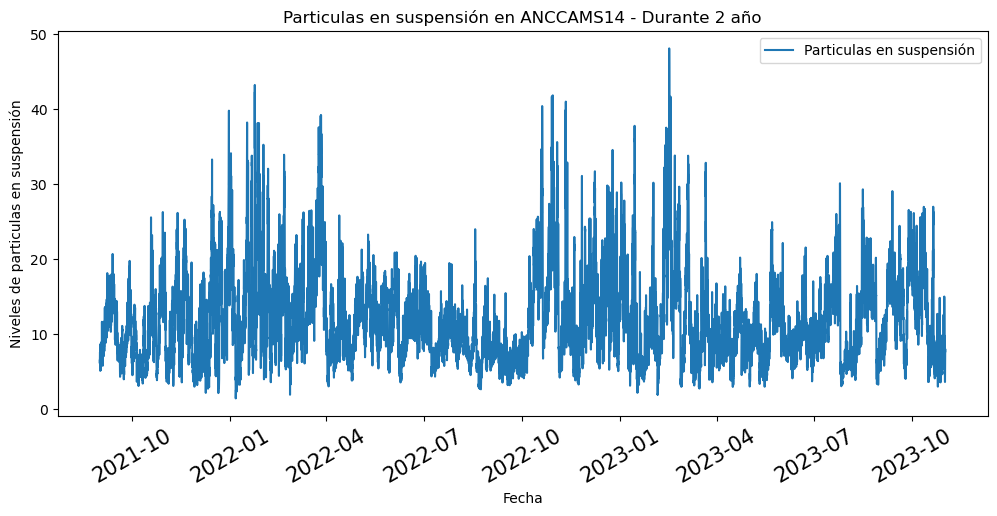

In [49]:
plt.figure(figsize=(12, 5))
plt.plot(df['PM2.5'], label='Particulas en suspensión')
plt.title(f'Particulas en suspensión en {df["code"][0]} - Durante 2 año')
plt.xlabel('Fecha')
plt.ylabel('Niveles de particulas en suspensión')
plt.xticks(rotation=30, fontsize=15)
plt.legend()
plt.show()

In [50]:
print(comentario["serie"])

        La serie temporal indica los niveles de las partículas en suspensión detectadas en ANCCAMS14 a lo largo de dos años.

        En cuanto a sus valores absolutos, se aprecia cómo estos fluctúan usualmente entre 7.5 y 20 µg/m³, pero hay cimas que rebasan los 35 µg/m³ la cual se considera segun la OMS un riesgo para la salud, 
        llegando a valores asociados con graves efectos en poblaciones vulnerables.

        Al cotejar con las pautas internacionales, una porción significativa de los datos excede el límite de exposición habital de la OMS (10 µg/m³ en promedio anual) y de la normativa europea (25 µg/m³). 
        Lo anterior señala que la población expuesta en el área permanece regularmente en niveles de riesgo, de moderado a elevado, particularmente en aquellos episodios donde la serie revela picos de 
        contaminación más severas por ejemplo, finales de 2022 y principios de 2023.

        Como conclusión, los niveles de PM2.5 no sólo exhiben una alta variabilidad dia

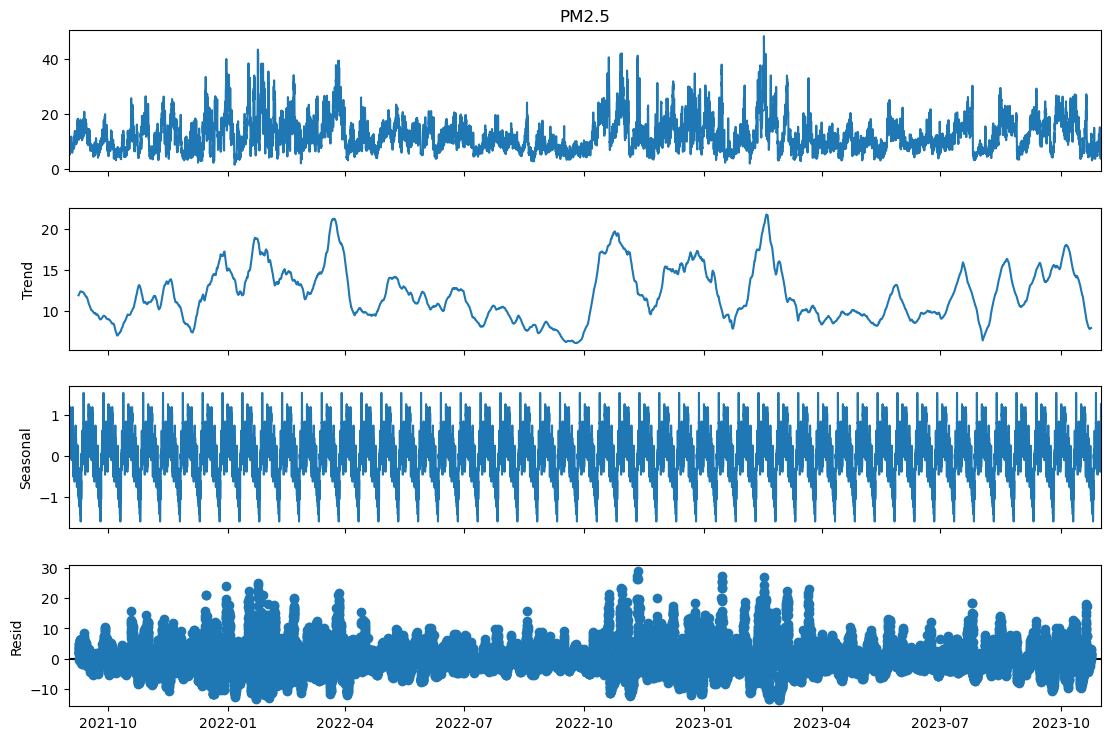

In [51]:
decomposition = sm.tsa.seasonal_decompose(df['PM2.5'], model='additive', period=365) # medio mes en horas 

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

In [52]:
print(comentario["descomposicion"])

        Interpretación de la descomposición de PM2. 5

        La serie se descompuso empleando un modelo aditivo, contemplando la periodicidad anual (365 horas aproximadamente 2 semanas); esta metodología se ajusta a las series ambientales porque la polución por partículas a menudo 
        depende de patrones climáticos estacionales (como invierno/verano, calefacción y las condiciones del tiempo).

        - Serie observada (Observed)

        La serie original exhibe notable variación diaria, con picos que sobrepasan los 35 µg/m³, más allá de los parámetros recomendados. La OMS propone una media anual de 10 µg/m³ frente a los 25 µg/m³ de europa. 
        Esos datos indican que, en varios periodos, la calidad del aire tuvo niveles dañinos para la salud pública.

        - Tendencia (Trend)

        No se aprecia ninguna tendencia predominante sino más bien se observa una combinación de subidas y bajadas probablemente asociado a la estacionalidad de la serie.

        - Estacionalidad

### Resampleo diario

In [53]:
df_reducido=df["PM2.5"]
df_weekly = df_reducido.resample('D').mean()  # 'D' indica resample diario
df_weekly = df_weekly.dropna()

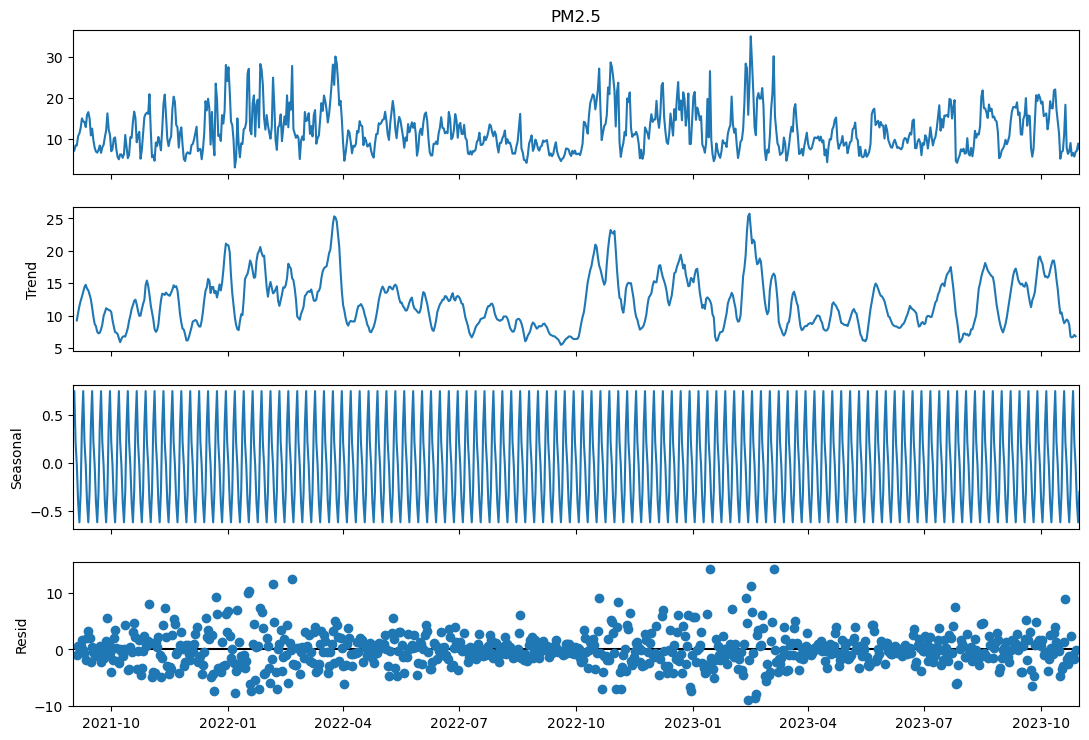

In [54]:
# Para series diario con semanal, establecemos period ~ 7  ya que son 7 dias 
decomposition_weekly = sm.tsa.seasonal_decompose(df_weekly, model='additive', period=7)
fig = decomposition_weekly.plot()
fig.set_size_inches(12, 8)
plt.show()

In [55]:
print(comentario["diario"])

Después de cambiar de un muestreo horario a uno diario, la serie se vuelve más suave, lo que ayuda a reducir el ruido. La descomposición aditiva con un periodo de 4 que captura ciclos trimestrales.

        - Serie observada (Mood_Score)

        La serie recoge valores significativamente menores siendo su máximo 17.5 inferior a lo reconocido como peligroso por la OMS.

        - Tendencia (Trend)

        No se aprecia ninguna tendencia predominante sino más bien se observa una combinación de subidas y bajadas probablemente asociado a la estacionalidad de la serie.

        - Estacionalidad (Seasonal)

        Se aprecia un claro patrón apoyando la idea de la estacionalidad por esaciones (trimestres).

        - Residuos (Residual/Irregular)

        Se obserban residuos pequeños de forma aleatoria reforzando la selección del modelo.


### Resampleo Semanal

In [56]:
df_reducido=df["PM2.5"]
df_weekly = df_reducido.resample('W').mean()  # 'W' indica resample semanal
df_weekly = df_weekly.dropna()

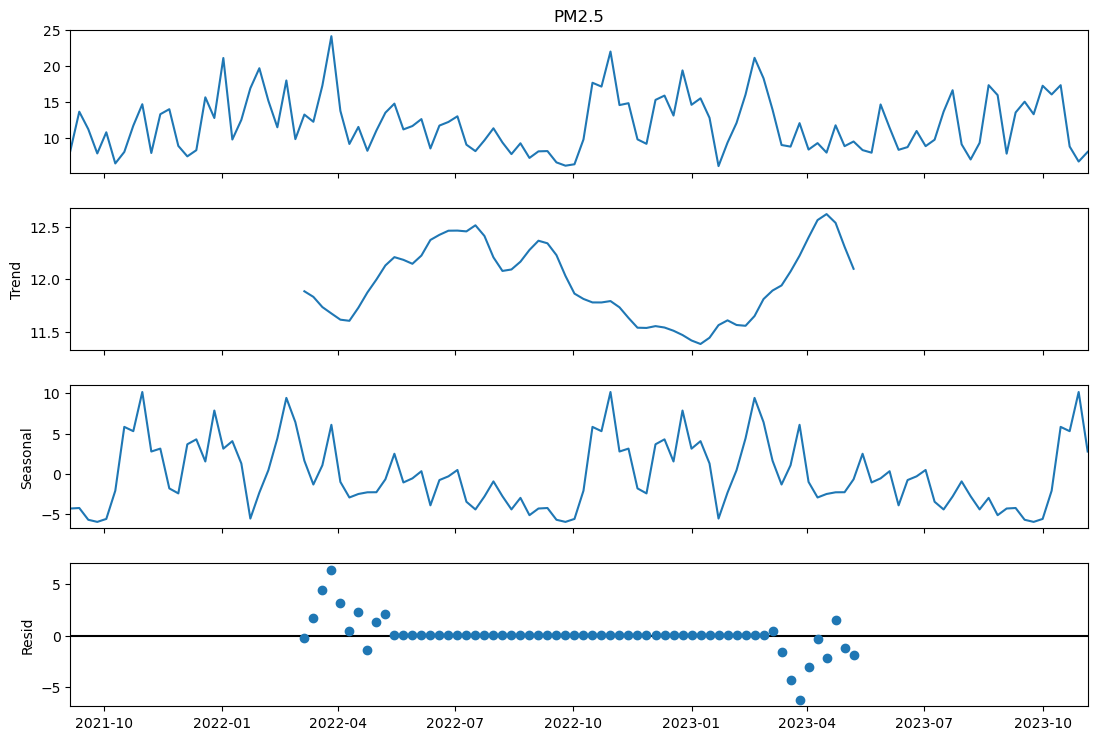

In [57]:
# Para series semanas con anual, establecemos period ~ 52  ya que son 52 semanas  
decomposition_weekly = sm.tsa.seasonal_decompose(df_weekly, model='additive', period=52)
fig = decomposition_weekly.plot()
fig.set_size_inches(12, 8)
plt.show()

In [58]:
print(comentario["semanalmente"])

        Después de cambiar de un muestreo diario a uno semanal, la serie se vuelve más suave (con oscilaciones entre 10 y 25), lo que ayuda a reducir el ruido. La descomposición aditiva con un periodo de 52 que captura ciclos anuales débiles.

        - Serie observada (Mood_Score)

        La serie es relativamente más estable, con baja volatilidad en comparación con la diaria, estando por debajo de 35, máximo en 25, valor a partir se considera un riesgo para la salud según la OMS.

        - Tendencia (Trend)

        Observando los valores del eje Y numéricamente se mantiene estable.

        - Estacionalidad (Seasonal)

        Se aprecia claramente el patrón anual , esta observación señala la presencia de un patrón climático anual que afecta las concentraciones de partículas; siendo, veranos mas limpios contrastando con inviernos más cargados.

        - Residuos (Residual/Irregular)

        Ruido mínimo (~0, con pocos valores atípicos)lo que indica una gran reducción respecto a 

In [59]:

df_month = df_reducido.resample('M').mean()  # 'M' indica resample mensual
df_month = df_month.dropna()

C:\Users\ergio\AppData\Local\Temp\ipykernel_7260\1780390782.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = df_reducido.resample('M').mean()  # 'M' indica resample mensual


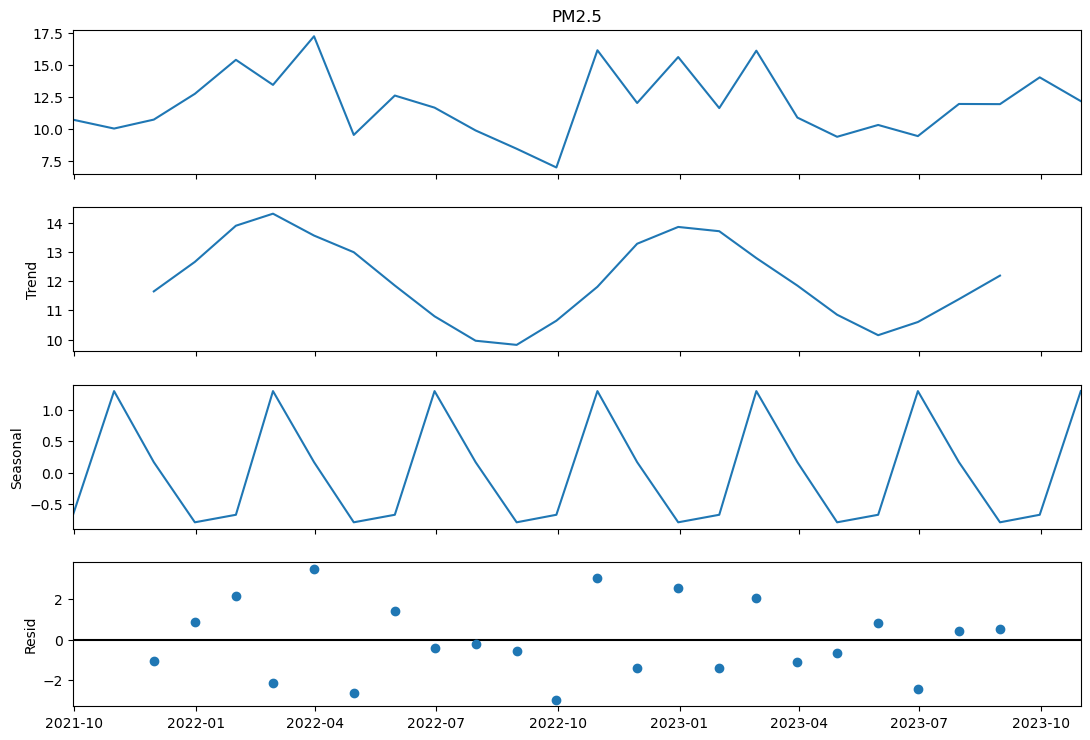

In [60]:
# Para series mensuales con trimestral, establecemos period ~ 4  ya que son 4 meses  
decomposition_month = sm.tsa.seasonal_decompose(df_month, model='additive', period=4)
fig = decomposition_month.plot()
fig.set_size_inches(12, 8)
plt.show()

In [61]:
print(comentario["mensual"])

        Después de cambiar de un muestreo diario a uno mensual, la serie se vuelve más suave (con pequeñas oscilaciones entre 7.5 y 17.5), lo que ayuda a reducir el ruido. La descomposición aditiva con un periodo de 4 que captura ciclos trimestrales.

        - Serie observada (Mood_Score)

        La serie recoge valores significativamente menores siendo su máximo 17.5 inferior a lo reconocido como peligroso por la OMS.

        - Tendencia (Trend)

        No se aprecia ninguna tendencia predominante sino más bien se observa una combinación de subidas y bajadas probablemente asociado a la estacionalidad de la serie.

        - Estacionalidad (Seasonal)

        Se aprecia un claro patrón apoyando la idea de la estacionalidad por esaciones (trimestres).

        - Residuos (Residual/Irregular)

        Se obserban residuos pequeños de forma aleatoria reforzando la selección del modelo.


# Práctica 2

1. **Toma el dataset explorado en el Día 1** (real o sintético) y aplica las siguientes técnicas:  
   - Media móvil con diferentes ventanas (7, 14, 30).  
   - Suavizado exponencial con distintos valores de alpha (0.1, 0.3, 0.8).  
2. **Genera** los gráficos ACF y PACF de tu serie y describe si hay picos significativos.  
3. **Descompón** la serie (con `statsmodels`), indicando el periodo que consideres apropiado para su estacionalidad.  
4. **Comenta** tus conclusiones en términos de:
   - ¿Cuál método de suavizado te ayuda más a ver la tendencia?  
   - ¿Tu serie presenta estacionalidad clara según la descomposición y la ACF?  
   - ¿Cómo se ve el residuo?


1. **Toma el dataset explorado en el Día 1** (real o sintético) y aplica las siguientes técnicas:  
   - Media móvil con diferentes ventanas (7, 14, 30).  
   - Suavizado exponencial con distintos valores de alpha (0.1, 0.3, 0.8).

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para la descomposición y las funciones de ACF/PACF
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Configuraciones de estilo
%matplotlib inline
sns.set_style('whitegrid')

In [63]:
from funciones_auxiliares import seleccionar_sede

# Read the CSV file
file = pd.read_csv("ancona_data.csv")

file['Date'] = pd.to_datetime(file['Date'])
file=file.set_index(['Date'])

file.head()
df = seleccionar_sede(file,"ASFF01")
df = df.drop(['station_name', 'id'], axis=1)

df.head()

La base elegida es: ASFF01


,NO2,O3,PM10,PM2.5,Latitude,Longitude,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,code
Date,,,,,,,,,,,,,,,,
2021-09-01 01:00:00,9.0,52.0,12.0,NaN,43.605924,13.492319,-0.528375,-0.987646,63.654631,66.567277,0.0,3.183978,2.847955,66.165643,85.427381,ASFF01
2021-09-01 02:00:00,8.0,44.0,7.0,NaN,43.605924,13.492319,-0.497376,-1.022090,63.223124,66.109644,0.0,3.183978,2.847955,65.523936,86.528841,ASFF01
2021-09-01 03:00:00,9.0,39.0,15.0,NaN,43.605924,13.492319,-0.583254,-1.130734,62.716574,65.703377,0.0,3.183978,2.847955,64.683303,88.244366,ASFF01
2021-09-01 04:00:00,10.0,31.0,14.0,NaN,43.605924,13.492319,-0.685097,-1.113368,62.272593,65.334601,0.0,3.183978,2.847955,64.040452,89.208185,ASFF01
2021-09-01 05:00:00,9.0,29.0,15.0,NaN,43.605924,13.492319,-0.689384,-1.092500,61.973522,65.087843,0.0,3.183978,2.847955,63.718396,89.235900,ASFF01


Como se observa hay valores faltantes por lo que se observará el numero de NAn que hay en la base

In [64]:
df.isnull().sum()

NO2                    1143
O3                     1944
PM10                   1647
PM2.5                  1607
Latitude                  0
Longitude                 0
Wind-Speed (U)            0
Wind-Speed (V)            0
Dewpoint Temp             0
Soil Temp                 0
Total Percipitation       0
Vegitation (High)         0
Vegitation (Low)          0
Temp                      0
Relative Humidity         0
code                      0
dtype: int64

In [65]:
len(df)

18983

Como el numero de datos faltantes en es inferior al 10% se procederá a eliminar los datso faltantes.

In [66]:
df = df.dropna()

Para el suavizado se utilizarán dos técnicas:

1. La **media móvil** la cual se utilizada en series temporales para reducir el ruido y resaltar tendencias subyacentes. Consiste en calcular la **media de un conjunto de observaciones dentro de una ventana temporal deslizante**. A medida que la ventana avanza, el promedio se recalcula, generando una versión suavizada de la serie original.

    En términos matemáticos, para una ventana de tamaño $k $:


    $$MA_t = \frac{1}{k} \sum_{i=0}^{k-1} x_{t-i}$$


    Este método permite:

    - Reducir fluctuaciones de corto plazo.  
    - Visualizar con mayor claridad el comportamiento general de la serie.  
    - Identificar tendencias o posibles cambios estructurales.

    Las ventanas pequeñas reaccionan rápidamente ante cambios en la serie, mientras que ventanas de mayor tamaño producen una curva más suave, útil para observar tendencias globales.

2. El **suavizado exponencial** la cual consiste en asignar un **peso diferente a las observaciones más recientes respecto a las anteriores**. A diferencia de la media móvil, donde todos los valores dentro de la ventana tienen el mismo peso.

    En términos matemáticos se expresa como:


    $$S_t = \alpha X_t + (1 - \alpha) S_{t-1}$$

    donde:

    - $X_t $ es el valor observado en el tiempo $t $,
    - $S_t $ es el valor suavizado,
    - $\alpha $ es el parámetro de suavizado, con $0 < \alpha < 1 $.

    Un $\alpha$ alto hace que el suavizado responda más rápidamente a cambios recientes mientras que un $\alpha$ bajo produce una curva más suave y menos sensible a fluctuaciones puntuales.




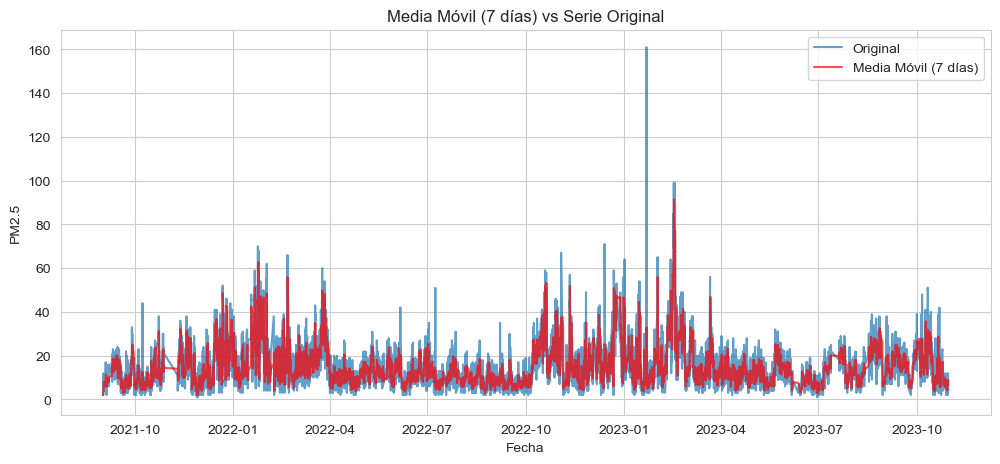

In [67]:
# Media Móvil de 7 días

df['MA_7'] = df['PM2.5'].rolling(window=7).mean()  # media móvil de 7 días

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['PM2.5'], label='Original', alpha=0.7)
plt.plot(df.index, df['MA_7'], label='Media Móvil (7 días)', color='red',alpha=0.7)
plt.title('Media Móvil (7 días) vs Serie Original')
plt.xlabel('Fecha')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

**<u>Interpretación resultados</u>.-**

Este gráfico compara la serie original diaria de concentraciones de PM2. 5 y su media móvil de 30 días. La serie original, muestra mucha variabilidad, día a día, con picos, agudos, de concentración, que complica la identificación de tendencias a mediano y largo plazo.

Al aplicar una ventana de 7 días, se genera una versión más suave de la serie eso ayuda a ver mejor las tendencias gen͏erales y ciclos semanales del conta͏min͏ante.

Se ve que la media mó͏vil copia la forma general de la serie pri͏mera, pero reduce mucho las subidas y bajadas rápi͏das que suce͏den͏ por cosas como͏ mal clima o mucho tráfico. Esto m͏uestra que la impureza͏ del ͏MP2 5 tiene un͏ pedazo͏ estac͏ional, lo ͏c͏ual pu͏ede e͏star relacionado con las͏ rutinas se͏manales.

Ya que no se obtiene una serie diferenciada de la original se probará a aumentar la ventana móvil.


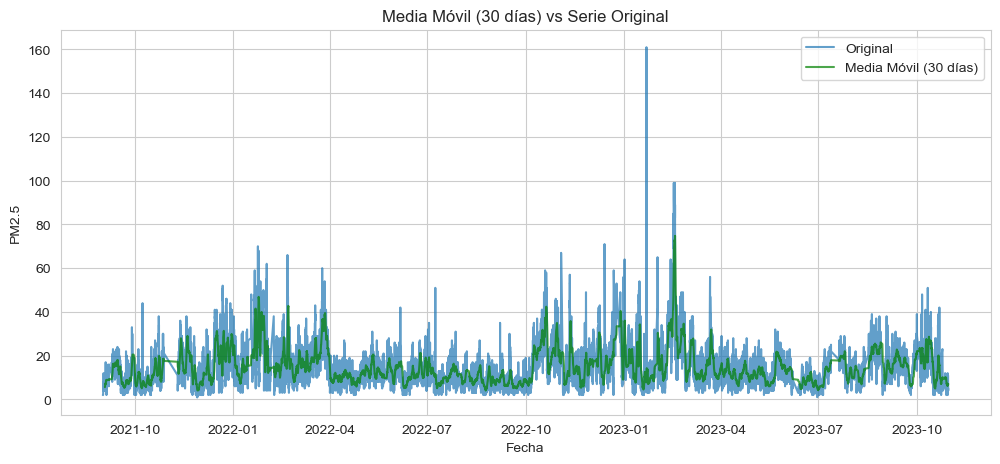

In [68]:
# Media Móvil de 30 días
df['MA_30'] = df['PM2.5'].rolling(window=30).mean()  # media móvil de 30 días

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['PM2.5'], label='Original', alpha=0.7)

plt.plot(df.index, df['MA_30'], label='Media Móvil (30 días)', color='green',alpha=0.7)

plt.title('Media Móvil (30 días) vs Serie Original')
plt.xlabel('Fecha')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

**<u>Interpretación resultados</u>.-**

Este gráfico compara la serie original diaria de concentraciones de PM2. 5 y su media móvil de 30 días. La serie original, muestra mucha variabilidad, día a día, con picos, agudos, de concentración, que complica la identificación de tendencias a mediano y largo plazo.

Al aplicar una ventana de 30 días, el suavizado resulta mucho más pronunciado que con la media móvil de 7 días, y esto ayuda a reducir el ruido y permite una observación más clara de la tendencia general en el nivel de contaminación. Esta media móvil es útil, sobre todo, para analizar cambios estacionales o mensuales en la calidad del aire.

Se puede ver, cómo la media móvil de 30 días suaviza los picos más extremos y destaca períodos de aumento o descenso constante en los niveles de PM2. 5. Esto indica que, aunque haya variaciones diarias importantes, los patrones mensuales revelan oscilaciones más estructurales, tal vez relacionadas con factores climáticos o cambios en la actividad humana ejemplo, como aumento de calefacción en invierno, o la bajada del tráfico en verano, etc..

Para poder observar una serie con tendencia clara se aumentará la ventana a un año (365 días)

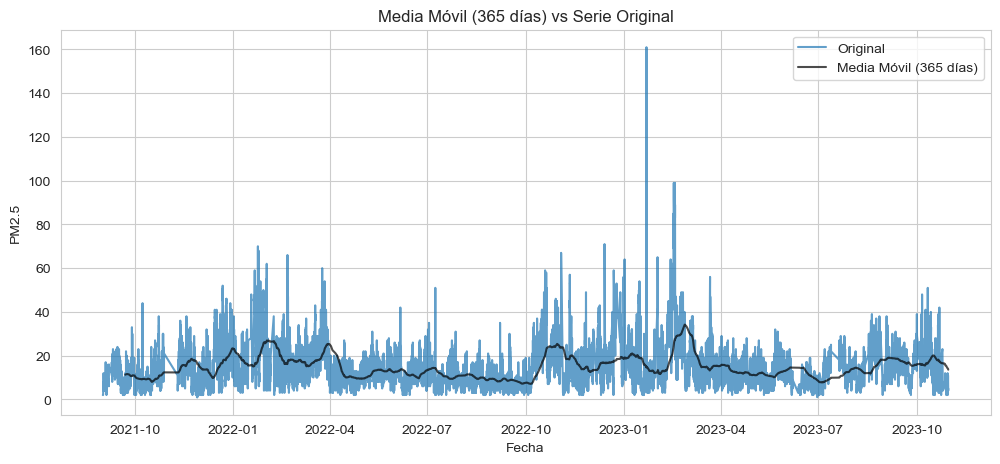

In [69]:
# Media Móvil de 365 días


df['MA_365'] = df['PM2.5'].rolling(window=365).mean()  # media móvil de 365 días
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['PM2.5'], label='Original', alpha=0.7)
plt.plot(df.index, df['MA_365'], label='Media Móvil (365 días)', color='black',alpha=0.7)
plt.title('Media Móvil (365 días) vs Serie Original')
plt.xlabel('Fecha')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

**<u>Interpretación resultados</u>.-** Media móvil de 365 días

Este gráfico compara la serie original diaria de concentraciones de PM2. 5 y su media móvil de 365 días. La serie original, muestra mucha variabilidad, día a día, con picos, agudos, de concentración, que complica la identificación de tendencias a mediano y largo plazo.

Se aprecia que los valores suavizados tienen un patrón más o menos estable, con un patrón repetitivo a lo largo del tiempo. En general, el promedio de PM2.5 muestra un declive después de los puntos más altos del 2022 y inicios de 2023, un hecho que podría sugerir una mejora constante en el aire o una reducción de emisiones en ese periodo.
Escoger una media móvil anual (365 días), es correcto, ya que:



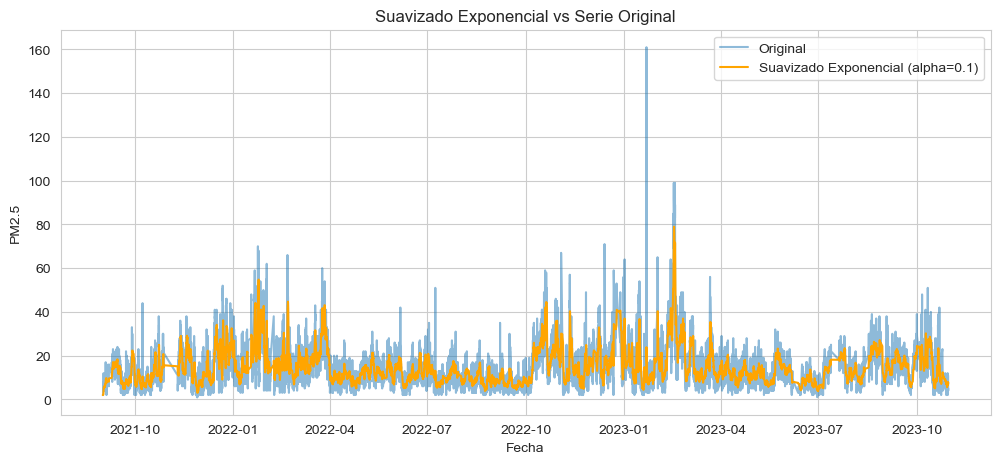

In [70]:
# Suavizado Exponencial alfa = 0.1

alpha = 0.1
df['EWMA_0.1'] = df["PM2.5"].ewm(alpha=alpha, adjust=False).mean()

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['PM2.5'], label='Original', alpha=0.5)
plt.plot(df.index, df['EWMA_0.1'], label=f'Suavizado Exponencial (alpha={alpha})', color='orange')
plt.title('Suavizado Exponencial vs Serie Original')
plt.xlabel('Fecha')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

**<u>Interpretación resultados</u>.-**

La gráfica muestra la serie inicial de las concentraciones de PM2.5 frente a su representación suavizada, hecha mediante un suavizado exponencial simple, usando el parámetro $\alpha$ a 0.1

Teniendo en cuenta que $\alpha$ vale 0.1, el suavizado se considera tardío y moderado, pues le da poco peso a las observaciones recientes; esto se nota en la curva suavizada, una línea anaranjada que sigue la dirección de la serie original, pero reduciendo las cambios repentinos y los picos cortos.

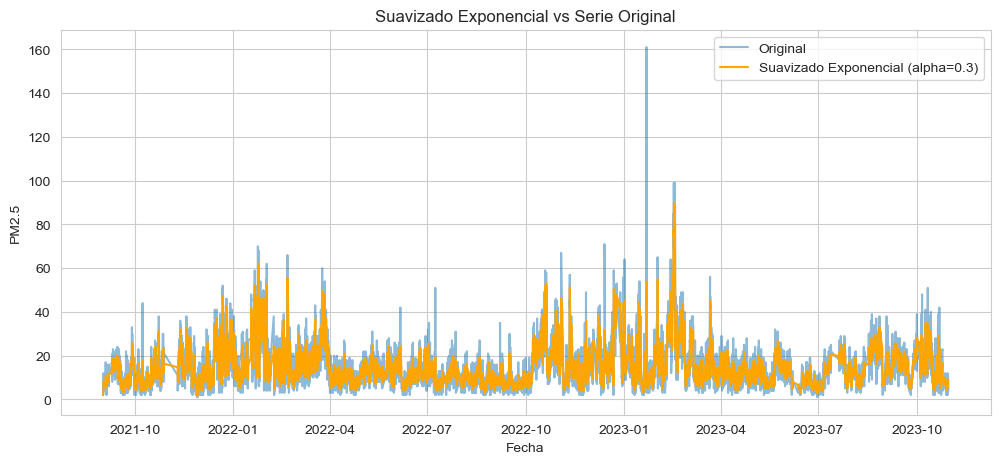

In [71]:
# Suavizado Exponencial alfa = 0.3

alpha = 0.3
df['EWMA_0.3'] = df["PM2.5"].ewm(alpha=alpha, adjust=False).mean()

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['PM2.5'], label='Original', alpha=0.5)
plt.plot(df.index, df['EWMA_0.3'], label=f'Suavizado Exponencial (alpha={alpha})', color='orange')
plt.title('Suavizado Exponencial vs Serie Original')
plt.xlabel('Fecha')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

**<u>Interpretación resultados</u>.-**

Esta gráfica compara la serie original de PM2 5 con la versión suavizada, empleando el suavizado exponencial simple, con un parámetro $\alpha = 0.3$

Al contrario del escenario anterior, donde $\alpha = 0.1$, este valor le da mas peso a las observaciones recientes, asi la serie suavizada linea naranja reacciona más pronto a los cambios en los niveles de contaminacion. Como resultado, el suavizado captura mejor las fluctuaciones a corto plazo, aunque mas de ruido si.

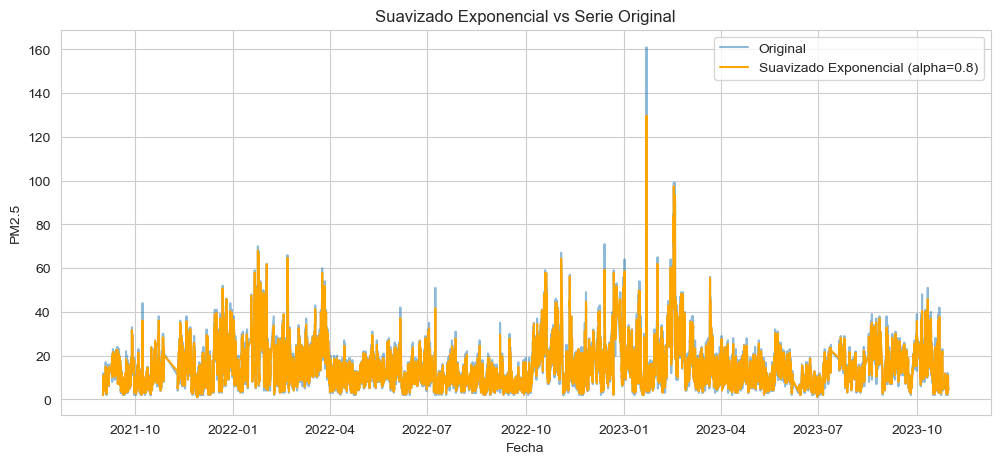

In [72]:
# Suavizado Exponencial alfa = 0.8

alpha = 0.8
df['EWMA_0.8'] = df["PM2.5"].ewm(alpha=alpha, adjust=False).mean()

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['PM2.5'], label='Original', alpha=0.5)
plt.plot(df.index, df['EWMA_0.8'], label=f'Suavizado Exponencial (alpha={alpha})', color='orange')
plt.title('Suavizado Exponencial vs Serie Original')
plt.xlabel('Fecha')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

**<u>Interpretación resultados</u>.-**

Esta gráfica muestra la serie original de PM2.5 en comparación con su versión suavizada. Este suavizado se realiza mediante suavizado exponencial usando un parametro de suavización, $\alpha = 0.8$.

Con un $\alpha$ tan alto, se le da bastante peso a las observaciones más recientes, por lo que la serie suavizada (en naranja) reacciona rápido a los cambios en los niveles de partículas. Por lo tanto, la curva suavizada se parece mucho a la original, conservando mucha variabilidad y picos repentinos.

En resumen, un $\alpha = 0.8$ hace que el suavizado sea bastante reactivo e inestable.

2. **Genera** los gráficos ACF y PACF de tu serie y describe si hay picos significativos. 

La **ACF (Autocorrelation Function)** mide la **correlación entre la serie temporal y sus propios rezagos**. Para cada lag $k$, calcula cuánto se parece la serie a sí misma desplazada $k$ pasos en el tiempo.

$$\rho(k) = \frac{\text{Cov}(X_t, X_{t-k})}{\text{Var}(X_t)}$$

Interpretación:

- Permite identificar **patrones temporales**, como persistencia, ciclos o estacionalidad.
- En modelos ARIMA, la ACF es útil para detectar componentes **MA(q)**:  
  – Una ACF que se corta abruptamente sugiere un término MA de orden igual al número de lags significativos.  
  – Una ACF que decrece lentamente indica posible presencia de dependencia prolongada.


La **PACF (Partial Autocorrelation Function)** mide la correlación entre la serie y sus rezagos **descontando los efectos de los rezagos intermedios**. Es decir, calcula la correlación "pura" entre $X_t$ y $X_{t-k}$ eliminando la influencia de los lags $1, 2, \dots, k-1 $.

Interpretación:

- La PACF es clave para identificar el componente **AR(p)**:  
  – Si la PACF se corta después del lag $p $, esto sugiere un modelo AR de orden $p $.  
  – Una PACF que decrece de forma gradual puede indicar necesidad de diferenciación.


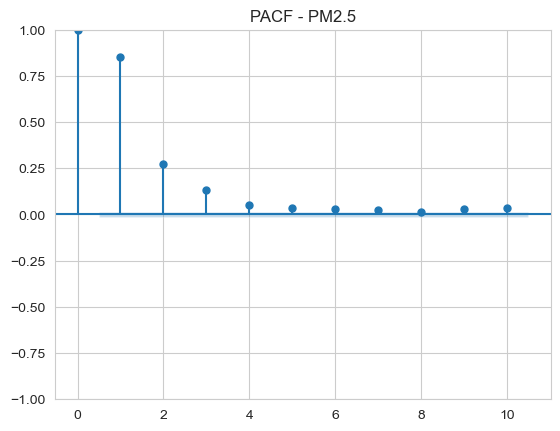

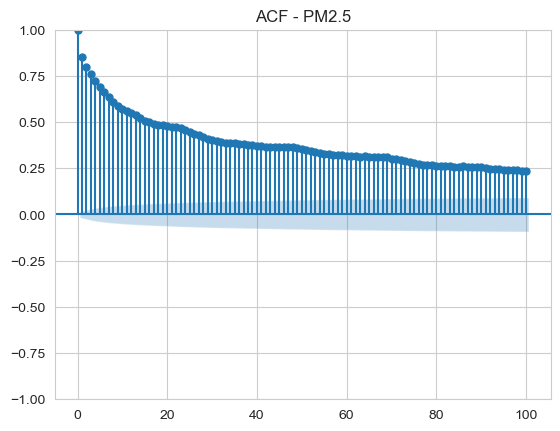

In [73]:
# Sección 5: Autocorrelación

# PACF
plot_pacf(df['PM2.5'], lags=10, title='PACF - PM2.5', method='ywm')
# method='ywm' es un método recomendado para calculo de PACF

# ACF
plot_acf(df['PM2.5'], lags=100, title='ACF - PM2.5')

plt.show()

De forma gráfica no se puede encontrar el punto de corte en ambas gráficas por lo que se intentará encontrar de forma estadística

In [74]:
from funciones_auxiliares import obtener_p_optimo, obtener_q_optimo

q = obtener_q_optimo(df['PM2.5'], nlags=50)
p = obtener_p_optimo(df['PM2.5'], nlags=50)

El valor estimado de q (MA) es: 0 ya que no se ha llegado a lags significativos en 50 lags
El valor estimado de p (AR) es: 0 ya que no se ha llegado a lags significativos en 50 lags


Que no se haya encontrado el valor de de q y p esto indica que probablemente la serie necesita una diferenciación para así ser estacionaria.

In [75]:
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df['PM2.5'])

# Imprime los resultados
print(f'Estadístico ADF: {test_result[0]}')
print(f'p-valor: {test_result[1]}')

# Interpreta el resultado
if test_result[1] < 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria.")

Estadístico ADF: -10.074573142974309
p-valor: 1.233458032676234e-17
La serie es estacionaria.


Como se puede ver la serie ya era estacionaria por lo que la hipótesis previa es errónea

3. **Descompón** la serie (con `statsmodels`), indicando el periodo que consideres apropiado para su estacionalidad.  

Este análisis se pude hacer en la práctica 1 al seleccionar la misma estación, pero al haber varias se hará el análisis de la descomposición de esta estación, si se quiere ver un análsis más profundo de está estación con el análisis de la serie, descomposición y resampleo semanal y mensual seleccione en la Practica 1 la estacion ASFF01.

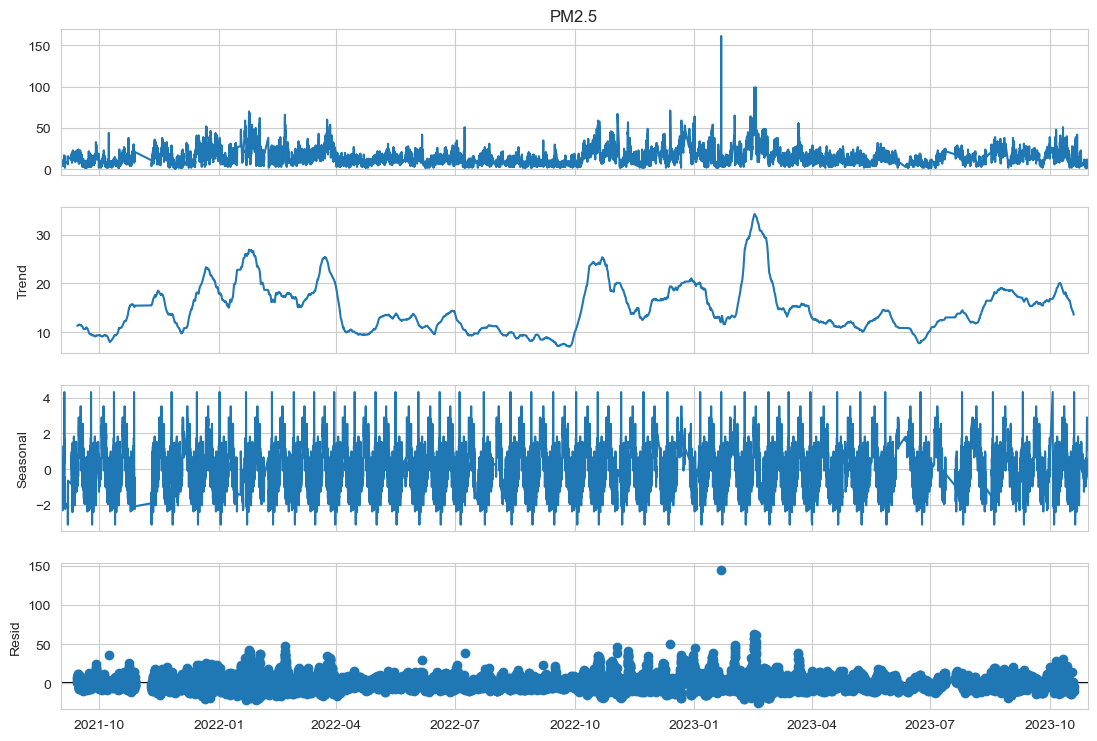

        Interpretación de la descomposición de PM2. 5

        La serie se descompuso empleando un modelo aditivo, contemplando la periodicidad anual (365 horas aproximadamente 2 semanas); esta metodología se ajusta a las series ambientales porque la polución por partículas a menudo depende de
        patrones climáticos estacionales(como invierno/verano, calefacción y las condiciones del tiempo).

        - Serie observada (Observed)

        La serie original exhibe notable variación diaria, con picos que sobrepasan los 50 µg/m³, mucho más allá de los parámetros recomendados. La OMS propone una media anual de 10 µg/m³ frente a los 25 µg/m³ de europa. 
        Esos datos indican que, en varios periodos, la calidad del aire tuvo niveles dañinos para la salud pública.

        - Tendencia (Trend)

        No se aprecia ninguna tendencia predominante sino más bien se observa una combinación de subidas y bajadas probablemente asociado a la estacionalidad de la serie.
        - Estacionali

In [76]:
from funciones_auxiliares import comentarios


comentario = comentarios(df)
# Para series diarias con estacionalidad anual, establecemos period ~ 365   
decomposition = sm.tsa.seasonal_decompose(df['PM2.5'], model='additive', period=365)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()
print(comentario["descomposicion"])

4. **Comenta** tus conclusiones en términos de:
   - ¿Cuál método de suavizado te ayuda más a ver la tendencia?  
   - ¿Tu serie presenta estacionalidad clara según la descomposición y la ACF?  
   - ¿Cómo se ve el residuo?

Estas cuestiones se han ido comentado durante la ejecución de la práctica.

# Practica 3

1. **Aplicar** estos métodos al dataset personal (u otro real).
2. **Comparar** resultados y anotar cuántos outliers se detectan.
3. **Ajustar** hiperparámetros (ej. `contamination` en IsolationForest, `threshold` en z-score) y ver su efecto.
4. (Opcional) **Agregar** variables exógenas (fiestas, clima, etc.) al modelo supervisado para ver si mejora la detección.

1. **Aplicar** estos métodos al dataset personal (u otro real).

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline
sns.set_style("whitegrid")

In [78]:
from funciones_auxiliares import seleccionar_sede

# Read the CSV file
file = pd.read_csv("ancona_data.csv")

file['Date'] = pd.to_datetime(file['Date'])
file=file.set_index(['Date'])

file.head()
df = seleccionar_sede(file,"ASFF01")
df = df.drop(['station_name', 'id'], axis=1)

df = df.dropna()
df.head()


La base elegida es: ASFF01


,NO2,O3,PM10,PM2.5,Latitude,Longitude,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,code
Date,,,,,,,,,,,,,,,,
2021-09-01 06:00:00,14.0,31.0,20.0,2.0,43.605924,13.492319,-0.404992,-0.670764,63.301116,66.347859,0.0,3.183978,2.847955,66.146842,83.480118,ASFF01
2021-09-01 07:00:00,23.0,19.0,11.0,2.0,43.605924,13.492319,-0.391898,-0.296313,63.273727,69.773492,0.0,3.183978,2.847955,70.346403,64.006898,ASFF01
2021-09-01 08:00:00,29.0,23.0,14.0,2.0,43.605924,13.492319,-0.490133,0.071959,63.031580,72.337534,0.0,3.183978,2.847955,72.332029,55.806772,ASFF01
2021-09-01 09:00:00,17.0,38.0,8.0,2.0,43.605924,13.492319,-0.585182,-0.009041,62.494674,74.467842,0.0,3.183978,2.847955,73.866032,48.917644,ASFF01
2021-09-01 10:00:00,22.0,36.0,6.0,2.0,43.605924,13.492319,-0.602954,0.161145,61.901319,76.312223,0.0,3.183978,2.847955,75.244930,43.252082,ASFF01


El modelo **ARIMA (AutoRegressive Integrated Moving Average)** es una combinación de tres modelos fundamentales:

- **AR (AutoRegresivo)**: el valor actual depende linealmente de valores pasados.  
  Un modelo AR(p) se expresa como:  
  $$X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \varepsilon_t$$

- **I (Integrado)**: consiste en aplicar diferencias para hacer la serie estacionaria.  
  Por ejemplo, una diferenciación de primer orden:  
  $$Y_t = X_t - X_{t-1}$$

- **MA (Media Móvil)**: el valor actual depende de errores pasados.  
  Un modelo MA(q) es:  
  $$X_t = \varepsilon_t + \theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q}$$

Un modelo ARIMA se escribe:

$$ARIMA(p, d, q)$$

donde:

- $p$: número de términos autorregresivos (AR)  
- $d$: número de diferenciaciones necesarias  
- $q$: número de términos de media móvil (MA)

In [79]:
# Sección 3: Ajuste simple de un modelo ARIMA
# Para un ejemplo rápido, seleccionamos manualmente p, d, q:
p, d, q = 1, 0, 1

# Generamos la serie en un formato un poco más "clásico" para ARIMA (simple array)
serie = df['PM2.5']

# Ajustamos el modelo
model = ARIMA(serie, order=(p, d, q))
results = model.fit()

print(results.summary())

c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                15192
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -45414.666
Date:                Tue, 18 Nov 2025   AIC                          90837.333
Time:                        20:59:32   BIC                          90867.847
Sample:                             0   HQIC                         90847.451
                              - 15192                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7887      0.536     27.590      0.000      13.738      15.839
ar.L1          0.9472      0.002    466.332      0.000       0.943       0.951
ma.L1         -0.3904      0.002   -156.392      0.0

In [80]:
# Sección 3: Ajuste simple de un modelo ARIMA
# Para un ejemplo rápido, seleccionamos manualmente p, d, q:
p, d, q = 1, 0, 2

# Generamos la serie en un formato un poco más "clásico" para ARIMA (simple array)
serie = df['PM2.5']

# Ajustamos el modelo
model = ARIMA(serie, order=(p, d, q))
results = model.fit()

print(results.summary())

c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                15192
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -45398.719
Date:                Tue, 18 Nov 2025   AIC                          90807.438
Time:                        20:59:36   BIC                          90845.581
Sample:                             0   HQIC                         90820.086
                              - 15192                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7886      0.569     26.007      0.000      13.674      15.903
ar.L1          0.9537      0.002    459.750      0.000       0.950       0.958
ma.L1         -0.3821      0.003   -150.035      0.0

In [81]:
# Sección 3: Ajuste simple de un modelo ARIMA
# Para un ejemplo rápido, seleccionamos manualmente p, d, q:
p, d, q = 2, 0, 4

# Generamos la serie en un formato un poco más "clásico" para ARIMA (simple array)
serie = df['PM2.5']

# Ajustamos el modelo
model = ARIMA(serie, order=(p, d, q))
results = model.fit()

print(results.summary())

c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                15192
Model:                 ARIMA(2, 0, 4)   Log Likelihood              -45332.216
Date:                Tue, 18 Nov 2025   AIC                          90680.432
Time:                        21:00:01   BIC                          90741.460
Sample:                             0   HQIC                         90700.668
                              - 15192                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2069      1.099     12.923      0.000      12.052      16.362
ar.L1          1.8477      0.012    157.221      0.000       1.825       1.871
ar.L2         -0.8489      0.012    -73.616      0.0

**<u>Interpretación resultados</u>.-**

El modelo ajustado para la serie **PM2.5** muestra una fuerte dependencia temporal, donde los coeficientes autorregresivos **AR(1)=1.85** y **AR(2)=-0.85** indican que el valor actual depende positivamente del día anterior y negativamente del segundo retraso, generando un patrón de corrección de picos. Los términos de media móvil (**MA(1) a MA(4)**) son significativos, reflejando la influencia de los errores pasados sobre el valor presente.

El modelo presenta un **AIC=90680.43** y **BIC=90741.46**, los mejores entre los modelos ARIMA probados. El **test de Ljung–Box (p=0.95)** indica ausencia de autocorrelación en los residuos, por lo que el modelo captura bien la estructura temporal de la serie. Sin embargo, el **test de Jarque–Bera (p≈0.00)** y la alta **curtosis (86.65)** revelan que los residuos no son normales y presentan colas largas, con ligera **heterocedasticidad (H=1.27)**.

En conjunto, el modelo ARIMA(2,0,4) describe adecuadamente la evolución del **PM2.5**, mostrando una fuerte persistencia temporal y cierta tendencia a la estabilización tras variaciones bruscas. No obstante, la no normalidad de los residuos sugiere que podrían explorarse extensiones como modelos **SARIMA** (como se hará en el apartado 4 si es el mejor modelo) para mejorar la representación de la volatilidad.


c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


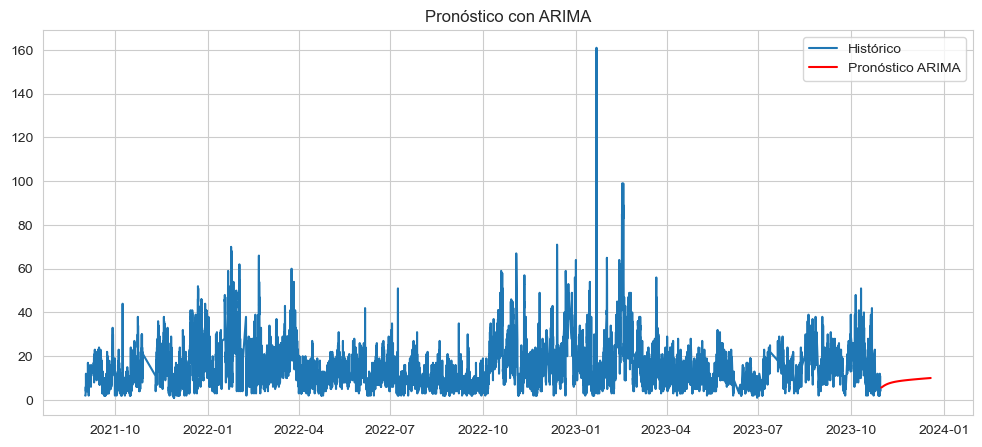

In [82]:
# Pronosticamos algunos días del futuro (50 horas)
pred_steps = 50
forecast = results.forecast(steps=pred_steps)

# Construimos un DataFrame para visualización
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=pred_steps, freq='D')
forecast_df = pd.DataFrame({'forecast': forecast.values}, index=forecast_index)

# Graficamos
plt.figure(figsize=(12,5))
plt.plot(df.index, df['PM2.5'], label='Histórico')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Pronóstico ARIMA', color='red')
plt.legend()
plt.title('Pronóstico con ARIMA')
plt.show()


Como no se tiene otro modelo para comparar el modelo ARIMA se usará el modelo de regresion lineal

In [83]:
# Sección 4: Modelo supervisado sencillo

df_supervised = df.copy()

# Creamos características: consumo (t-1), consumo (t-2)
df_supervised['consumo_lag1'] = df_supervised['PM2.5'].shift(1)
df_supervised['consumo_lag2'] = df_supervised['PM2.5'].shift(2)

# Eliminamos filas iniciales con NaN por shift
df_supervised.dropna(inplace=True)

# Definimos X e y
X = df_supervised[['consumo_lag1', 'consumo_lag2']]
y = df_supervised['PM2.5']

# Separamos un conjunto de entrenamiento y test (80% para entrenar)
split_index = int(len(df_supervised)*0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [84]:

# Entrenamos modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Coeficientes:", lr.coef_)
print("Intercepto:", lr.intercept_)


Coeficientes: [0.64176086 0.25539045]
Intercepto: 1.5475196006823015


MSE del modelo supervisado (Linear Regression): 19.128963186454968


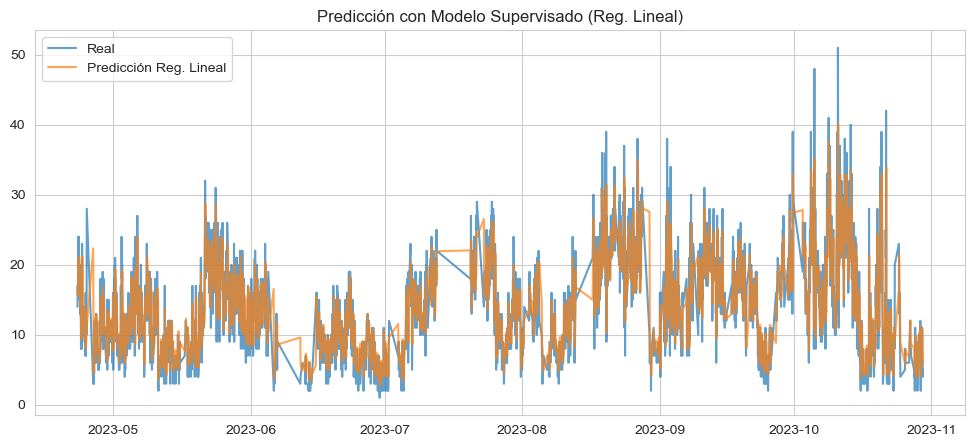

In [85]:

# Predicción en test
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE del modelo supervisado (Linear Regression):", mse)

# Creamos DataFrame para comparar
df_pred = pd.DataFrame({'real': y_test, 'pred': y_pred}, index=y_test.index)

plt.figure(figsize=(12,5))
plt.plot(df_pred.index, df_pred['real'], label='Real', alpha=0.7)
plt.plot(df_pred.index, df_pred['pred'], label='Predicción Reg. Lineal', alpha=0.7)
plt.title('Predicción con Modelo Supervisado (Reg. Lineal)')
plt.legend()
plt.show()


Debido a que LinearRegression de scikit-learn no calcula directamente AIC ni BIC, porque no está basado en máxima verosimilitud se calculará manualmente a partir del error residual (RSS) y el número de parámetros del modelo.

siguinedo la siguinete ecuación:

$$ AIC = n \cdot \ln\left(\frac{RSS}{n}\right) + 2k $$

$$ BIC = n \cdot \ln\left(\frac{RSS}{n}\right) + k \cdot \ln(n) $$

Donde:
- $ n $: número de observaciones  
- $ k$: número de parámetros (incluyendo el intercepto)  
- $ RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $: suma de los residuos al cuadrado  


In [86]:

# Número de observaciones y parámetros
n = len(y_test)
k = X_train.shape[1] + 1  # +1 por el intercepto

# RSS (Residual Sum of Squares)
rss = np.sum((y_test - y_pred) ** 2)

# Cálculo de AIC y BIC
aic = n * np.log(rss / n) + 2 * k
bic = n * np.log(rss / n) + k * np.log(n)

print(f"AIC: {aic:.2f}")
print(f"BIC: {bic:.2f}")


AIC: 8971.76
BIC: 8989.81


**<u>Interpretación de resultados</u>.-**  
El modelo de **regresión lineal múltiple** estimado utiliza como variables explicativas los valores rezagados de los niveles de PM2.5 en los dos periodos anteriores (`consumo_lag1` y `consumo_lag2`). Los coeficientes obtenidos son los siguientes:

- `Intercepto`: $\beta_0 = 1.5475$  
- `consumo_lag1`: $\beta_1 = 0.6418$  
- `consumo_lag2`: $\beta_2 = 0.2554$  

La interpretación de estos parámetros es la siguiente:

- **Intercepto ($\beta_0 = 1.5475$):** representa el nivel estimado de PM2.5 cuando los valores rezagados son nulos. Aunque este escenario carece de interpretación práctica directa (ya que en la realidad no se espera concentración cero en los días previos), el intercepto es necesario para ajustar la recta de regresión.

- **PM2.5 en el periodo anterior (`consumo_lag1`, $\beta_1 = 0.6418$):** indica que, manteniendo constante el valor de `consumo_lag2`, **un aumento de una unidad en el nivel de PM2.5 del día previo se asocia con un incremento de aproximadamente 0.64 unidades en el valor actual de PM2.5**. Este resultado evidencia una fuerte dependencia temporal de corto plazo.

- **PM2.5 dos periodos atrás (`consumo_lag2`, $\beta_2 = 0.2554$):** sugiere que, manteniendo constante `consumo_lag1`, **un incremento de una unidad en el valor de PM2.5 de hace dos días aumenta en promedio 0.26 unidades la concentración actual**. Esto refuerza la persistencia temporal del contaminante.

En conjunto, el modelo refleja que los niveles de PM2.5 **dependen fuertemente de los valores de los días anteriores**, mostrando una dinámica temporal estable y predecible. El **error cuadrático medio (MSE = 19.13)** indica que las predicciones se aproximan razonablemente bien a los valores observados.  

Los criterios de información **AIC = 8971.76** y **BIC = 8989.81** proporcionan una medida del equilibrio entre ajuste y complejidad del modelo, siendo útiles para comparar con otras especificaciones posteriores. En este contexto, estos valores sugieren que el modelo ofrece un ajuste adecuado sin


2. **Comparar** resultados y anotar cuántos outliers se detectan.

**<u>Comparación de modelos</u>.-**  
Se han estimado dos tipos de modelos distintos para analizar y predecir el comportamiento del nivel de **PM2.5**:

1. **Modelo de regresión lineal múltiple**, basado en los valores rezagados del dia anterior y hace dos (`consumo_lag1` y `consumo_lag2`).  
2. **Modelo ARIMA**, cuyo mejor resultado ha sido con (2,0,4), que incorpora componentes autorregresivos y de medias móviles para capturar la dependencia temporal y la estructura del error.


Debido a las métricas de comparación entre ambos modelos se selecciona al modelo lineal, con **AIC = 8971.76** y **BIC = 8989.81**, como mejor modelo predictivo frente al modelo **ARIMA(2,0,4) (AIC = 90680.43, BIC = 90741.46)** debido a la diferencia en la pérdida de información y la complejidad del modelo.



Número de anomalías detectadas (z-score): 265


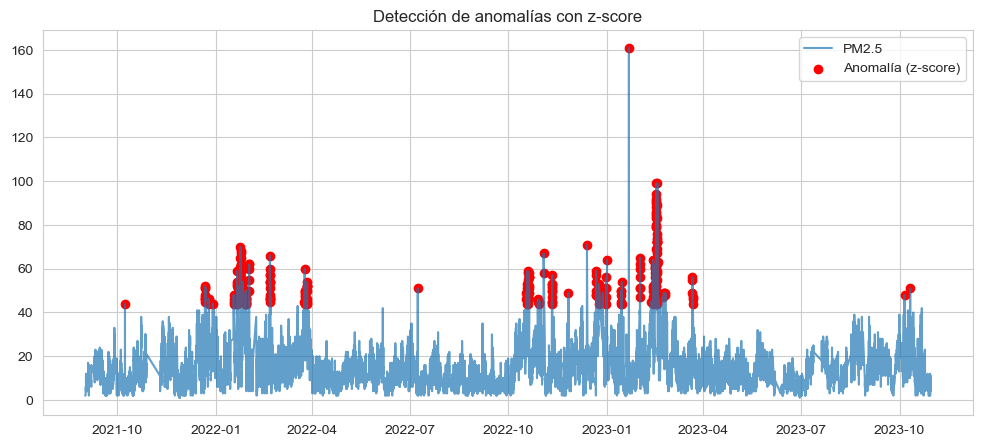

In [87]:
# Sección 2.1: z-score
df['z_score'] = zscore(df['PM2.5'])
threshold = 3  # umbral típico
df['anomaly_z'] = (df['z_score'].abs() > threshold).astype(int)

print("Número de anomalías detectadas (z-score):", df['anomaly_z'].sum())

# Visualizamos en un plot
plt.figure(figsize=(12,5))
plt.plot(df.index, df['PM2.5'], label='PM2.5', alpha=0.7)
plt.scatter(df.index[df['anomaly_z'] == 1],
            df['PM2.5'][df['anomaly_z'] == 1],
            color='red', label='Anomalía (z-score)')
plt.title("Detección de anomalías con z-score")
plt.legend()
plt.show()


**<u>Interpretación resultados</u>.-**  
Para detectar puntos atípicos en la serie temporal de concentraciones de PM2.5, se emplea el **z-score**, una métrica que estandariza cada observación indicando cuántas desviaciones estándar se aleja de la media. Valores con |z| > 3 suelen considerarse inusuales bajo un comportamiento aproximadamente normal, por lo que este umbral utilizado como criterio de anomalía. Este método solo se puede usar si los datos siguen una distribución normal que no es el caso que se trata pero como está en los métodos que hay que utilizar por eso se realiza.

Aplicando este método al conjunto de datos, se identifican **265 anomalías**, distribuidas principalmente en dos zonas: a comienzos de 2022 y durante el invierno-inicio de 2023. Todos ellos se situan en momentos en los que la concentración de PM2.5 supera notablemente el nivel habitual, evidenciando episodios de contaminación elevada, posiblemente debido a condiciones meteorológicas desfavorables o posibles errores de medición, aunque esto último es poco probable ya que los niveles son parecidos en todas las estaciones de observación.


Anomalías detectadas en test (residuales z-score): 44


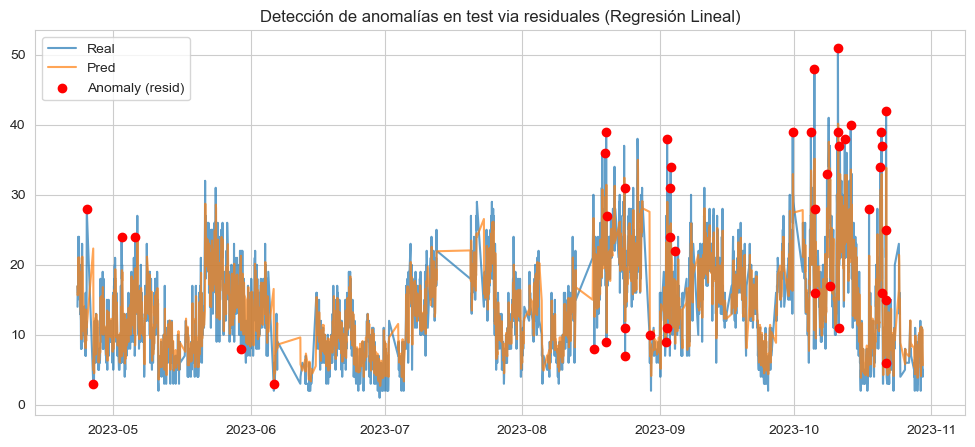

In [88]:
df_pred['resid'] = df_pred['real'] - df_pred['pred']
df_pred['resid_z'] = zscore(df_pred['resid'])

resid_threshold = 3
df_pred['anomaly_resid'] = (df_pred['resid_z'].abs() > resid_threshold).astype(int)

print("Anomalías detectadas en test (residuales z-score):", df_pred['anomaly_resid'].sum())

# Visualizamos
plt.figure(figsize=(12,5))
plt.plot(df_pred.index, df_pred['real'], label='Real', alpha=0.7)
plt.plot(df_pred.index, df_pred['pred'], label='Pred', alpha=0.7)

# Resaltar anomalías
anomalies = df_pred[df_pred['anomaly_resid'] == 1]
plt.scatter(anomalies.index, anomalies['real'], color='red', label='Anomaly (resid)', zorder=5)

plt.title("Detección de anomalías en test via residuales (Regresión Lineal)")
plt.legend()
plt.show()


Anomalías detectadas (Isolation Forest): 271


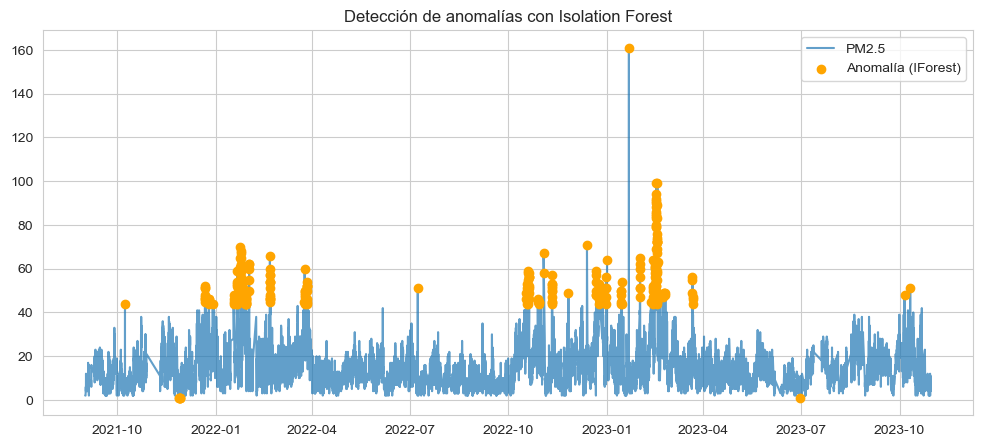

In [89]:
df_iforest = df.copy().dropna()

# IsolationForest requiere X en formato array
X_if = df_iforest[['PM2.5']]  # aquí solo usamos 1 feature, la propia serie
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
iso_forest.fit(X_if)

# predict: -1 = anómalo, 1 = normal
df_iforest['anomaly_if'] = iso_forest.predict(X_if)
df_iforest['anomaly_if'] = df_iforest['anomaly_if'].apply(lambda x: 1 if x == -1 else 0)

print("Anomalías detectadas (Isolation Forest):", df_iforest['anomaly_if'].sum())

# Visualizamos
plt.figure(figsize=(12,5))
plt.plot(df_iforest.index, df_iforest['PM2.5'], label='PM2.5', alpha=0.7)
plt.scatter(df_iforest.index[df_iforest['anomaly_if'] == 1],
            df_iforest['PM2.5'][df_iforest['anomaly_if'] == 1],
            color='orange', label='Anomalía (IForest)', zorder=5)
plt.title("Detección de anomalías con Isolation Forest")
plt.legend()
plt.show()

**<u>Interpretación resultados</u>.-**  
Isolation Forest es un método basado en árboles aleatorios diseñado específicamente para **detectar observaciones anómalas**. Su principio consiste en que los valores con muy pocas divisiones dentro del bosque de árboles se consideran outliers. Esto permite detectar anomalías incluso cuando la distribución de los datos no sigue una normal, a diferencia del z-score, que depende de la media y la desviación estándar.

Aplicando este método a la serie de PM2.5, se identifican **271 anomalías**, una cifra similar pero ligeramente superior a la obtenida con el método del z-score. Las anomalías señaladas aparecen concentradas en períodos donde la contaminación experimenta **picos abruptos**, destacando especialmente el invierno de 2022-2023 y episodios concretos a comienzos de 2022. El modelo también detecta valores atípicos más aislados en momentos donde el nivel general de PM2.5 es bajo, lo que sugiere sensibilidad a variaciones locales bruscas cosa que no se apreciaba con el z-score.

In [90]:
df_compare = pd.DataFrame({
    'z_score': df['anomaly_z'],
    'iforest': df_iforest['anomaly_if']
}, index=df.index)

df_compare['match'] = (df_compare['z_score'] == df_compare['iforest']).astype(int)

print("Coincidencias en la etiqueta de anomalía:", df_compare['match'].sum(), "de", len(df_compare))

Coincidencias en la etiqueta de anomalía: 15186 de 15192


In [91]:
df_compare = pd.DataFrame(index=df.index)

df_compare['z_anomaly'] = df['anomaly_z'].fillna(0)
df_compare['iforest_anomaly'] = df_iforest['anomaly_if'].fillna(0)

# Residual-based anomalies solo se definió en test data
df_compare['resid_anomaly'] = 0
df_compare.loc[df_pred.index, 'resid_anomaly'] = df_pred['anomaly_resid'].fillna(0)

df_compare['sum'] = df_compare.sum(axis=1)
df_compare.head(10)



,z_anomaly,iforest_anomaly,resid_anomaly,sum
Date,,,,
2021-09-01 06:00:00,0,0,0,0
2021-09-01 07:00:00,0,0,0,0
2021-09-01 08:00:00,0,0,0,0
2021-09-01 09:00:00,0,0,0,0
2021-09-01 10:00:00,0,0,0,0
2021-09-01 11:00:00,0,0,0,0
2021-09-01 12:00:00,0,0,0,0
2021-09-01 13:00:00,0,0,0,0
2021-09-01 18:00:00,0,0,0,0


La columna sum nos indica el número de veces que esa observación ha sido detectado como una anomalia, como no se aprecia ninguno en el head se cuantificarán en la siguiente celda

In [92]:
print(df_compare["sum"].unique())
print(f"Número de observaciones que han sido detectadas por dos pruebas distintas:{df_compare["sum"][df_compare["sum"] == 2].sum()}")
print(f"Número de observaciones que han sido detectadas por tres pruebas distintas:{df_compare["sum"][df_compare["sum"] == 3].sum()}")

[0 2 1 3]
Número de observaciones que han sido detectadas por dos pruebas distintas:526
Número de observaciones que han sido detectadas por tres pruebas distintas:6


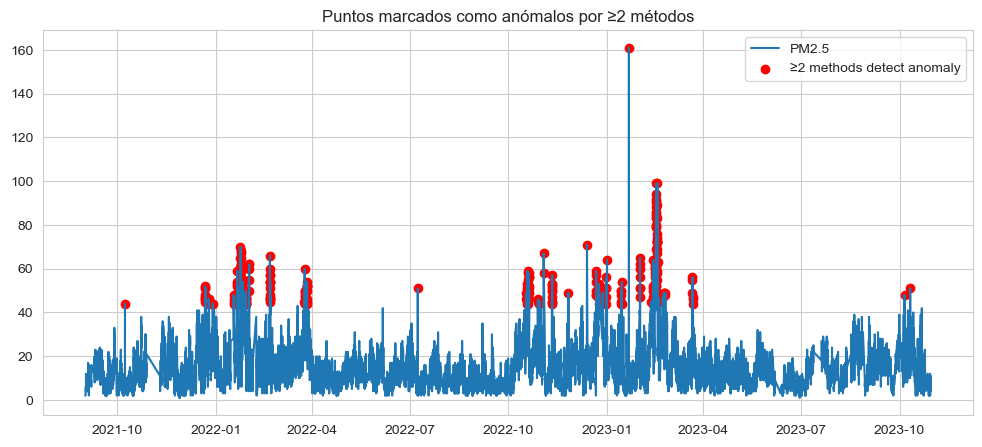

In [93]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['PM2.5'], label='PM2.5')
multi_anomalies = df_compare[df_compare['sum'] >= 2].index
plt.scatter(multi_anomalies, df.loc[multi_anomalies, 'PM2.5'],
            color='red', label='≥2 methods detect anomaly')
plt.title("Puntos marcados como anómalos por ≥2 métodos")
plt.legend()
plt.show()

**<u>Interpretación resultados</u>.-**  
La comparación conjunta de los métodos de detección de anomalías (z-score, Isolation Forest y resid anomaly) permite evaluar la **consistencia** con la que ciertos puntos de la serie de PM2.5 se consideran atípicos. En este análisis, un total de **526 observaciones** fueron marcadas como anómalas por **al menos dos métodos distintos**, mientras que **6 observaciones** fueron detectadas simultáneamente por **los tres métodos**.

El gráfico muestra claramente que las anomalías coincidentes entre métodos se agrupan en periodos bien definidos en picos de contaminación durante el invierno de 2022, episodios intensos a finales de 2022 y el gran pico a comienzos de 2023. Estos momentos representan valores que se apartan de forma significativa del comportamiento habitual de la serie y cuya confirmación por múltiples técnicas sugiere que se trata de episodios **robustosamente anómalos**.

La coincidencia entre métodos aporta mayor fiabilidad devido a los diferentes enfoques de los métodos por lo que al  coincidir en señalar los mismos puntos, es más probable que representen eventos excepcionales, como situaciones meteorológicas inusuales, intrusiones de polvo, errores de medición o incrementos bruscos de emisiones.

3. **Ajustar** hiperparámetros (ej. `contamination` en IsolationForest, `threshold` en z-score) y ver su efecto.

Como se indica ene el ejercicio se utilizarán diversos valores de los hiperparámetros para ver la influencia de los mismos en los resultados, antes de ello se explicará los hiperparámetros a optimizar:

**Umbral del z-score (threshold):** define cuántas desviaciones estándar por encima o por debajo de la media se considera un punto como anómalo. Valores más bajos hacen que el modelo detecte más anomalías, mientras que valores altos lo vuelven más restrictivo.

**Contaminación (contamination) en Isolation Forest:** representa la proporción estimada de anomalías en el conjunto de datos. Un valor bajo implica que el modelo asume que casi todos los puntos son normales, mientras que uno alto lo hace más sensible a detectar outliers.

In [15]:
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_iforest = df.copy().dropna()
X_if = df_iforest[['PM2.5']]

threshold_values = [2, 2.5, 3, 3.5, 4]
z_results = []

for th in threshold_values:
    df_iforest[f'z_anom_{th}'] = (zscore(df_iforest['PM2.5']).abs() > th).astype(int)
    count = df_iforest[f'z_anom_{th}'].sum()
    z_results.append({'threshold': th, 'anomalies': count})

z_summary = pd.DataFrame(z_results)
print("Resultados variando el umbral z-score:")
print(z_summary)

KeyError: "None of [Index(['PM2.5'], dtype='object')] are in the [columns]"

In [95]:
contamination_values = [0.01, 0.02, 0.05, 0.075, 0.1, 0.2]
if_results = []

for cont in contamination_values:
    iso_forest = IsolationForest(n_estimators=100, contamination=cont, random_state=42)
    iso_forest.fit(X_if)
    preds = iso_forest.predict(X_if)
    df_iforest[f'iforest_{cont}'] = np.where(preds == -1, 1, 0)
    count = df_iforest[f'iforest_{cont}'].sum()
    if_results.append({'contamination': cont, 'anomalies': count})

if_summary = pd.DataFrame(if_results)
print("\nResultados variando contamination en IsolationForest:")
print(if_summary)


Resultados variando contamination en IsolationForest:
   contamination  anomalies
0          0.010        148
1          0.020        271
2          0.050        700
3          0.075       1096
4          0.100       1449
5          0.200       2698


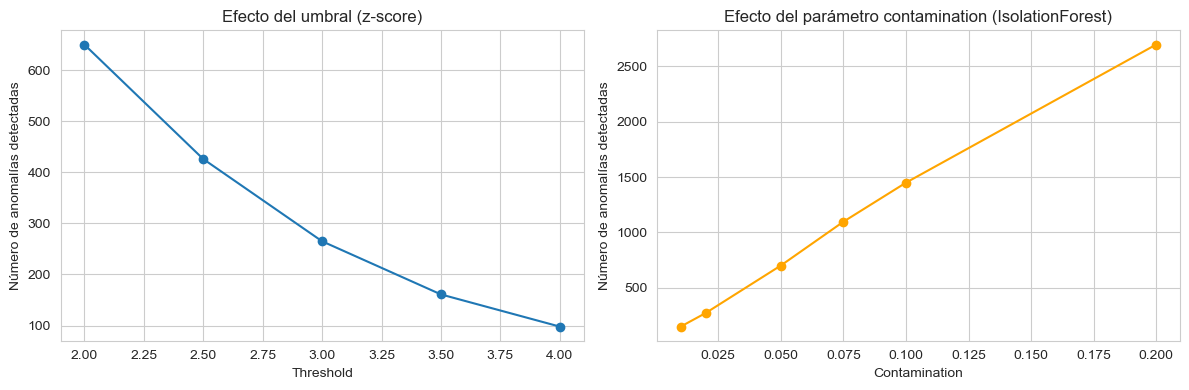

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(z_summary['threshold'], z_summary['anomalies'], marker='o')
ax[0].set_title("Efecto del umbral (z-score)")
ax[0].set_xlabel("Threshold")
ax[0].set_ylabel("Número de anomalías detectadas")

ax[1].plot(if_summary['contamination'], if_summary['anomalies'], marker='o', color='orange')
ax[1].set_title("Efecto del parámetro contamination (IsolationForest)")
ax[1].set_xlabel("Contamination")
ax[1].set_ylabel("Número de anomalías detectadas")

plt.tight_layout()
plt.show()

**<u>Interpretación de resultados</u>.-**  

En el gráfico de la izquierda se observa cómo el **número de anomalías detectadas mediante z-score** disminuye a medida que aumenta el valor del umbral (*threshold*). Esto ocurre porque un umbral más alto requiere desviaciones más extremas respecto a la media para considerar un punto como anómalo. Por tanto, valores como `threshold = 2` son más sensibles (detectan más anomalías), mientras que `threshold = 4` son más conservadores.

En el gráfico de la derecha, el **parámetro `contamination` del modelo Isolation Forest** muestra el efecto contrario: al incrementar su valor, el modelo asume que una mayor proporción de los datos son anómalos, aumentando así el número de detecciones. 

Ambas gráficas muestran la importancia de ajustar adecuadamente los hiperparámetros, ya que determinan el equilibrio entre **sensibilidad** (mayor detección) y **precisión** (menor número de falsos positivos).

4. (Opcional) **Agregar** variables exógenas (fiestas, clima, etc.) al modelo supervisado para ver si mejora la detección.

In [97]:
# Sección 4: Modelo supervisado sencillo

df_supervised = df.copy()

# Creamos características: consumo (t-1), consumo (t-2)
df_supervised['consumo_lag1'] = df_supervised['PM2.5'].shift(1)
df_supervised['consumo_lag2'] = df_supervised['PM2.5'].shift(2)

# Eliminamos filas iniciales con NaN por shift
df_supervised.dropna(inplace=True)

# Definimos X e y
X = df_supervised[['consumo_lag1', 'consumo_lag2','PM10','Wind-Speed (U)','Wind-Speed (V)']]
y = df_supervised['PM2.5']

# Separamos un conjunto de entrenamiento y test (80% para entrenar)
split_index = int(len(df_supervised)*0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [98]:
# Entrenamos modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Coeficientes:", lr.coef_)
print("Intercepto:", lr.intercept_)

Coeficientes: [ 0.56855512  0.21965628  0.09031     0.01348489 -0.09151903]
Intercepto: 0.9615956148967584


MSE del modelo supervisado (Linear Regression): 18.91224149658732


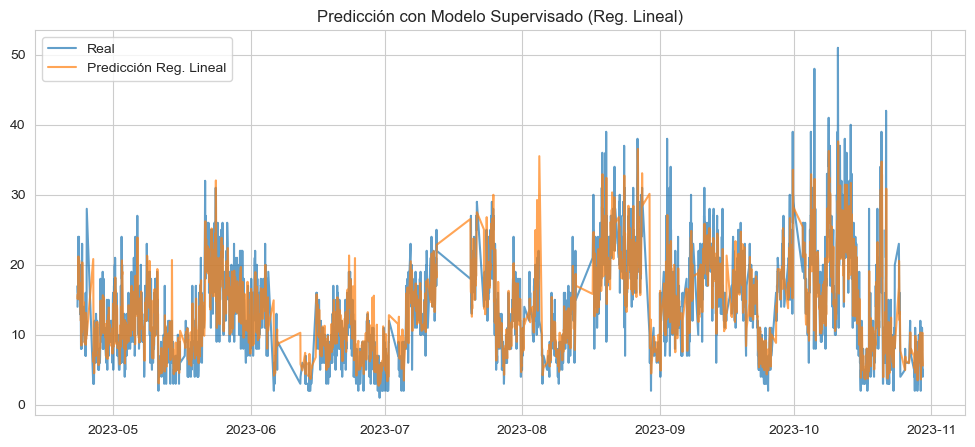

In [99]:
# Predicción en test
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE del modelo supervisado (Linear Regression):", mse)

# Creamos DataFrame para comparar
df_pred = pd.DataFrame({'real': y_test, 'pred': y_pred}, index=y_test.index)

plt.figure(figsize=(12,5))
plt.plot(df_pred.index, df_pred['real'], label='Real', alpha=0.7)
plt.plot(df_pred.index, df_pred['pred'], label='Predicción Reg. Lineal', alpha=0.7)
plt.title('Predicción con Modelo Supervisado (Reg. Lineal)')
plt.legend()
plt.show()


In [100]:
# Número de observaciones y parámetros
n = len(y_test)
k = X_train.shape[1] + 1  # +1 por el intercepto

# RSS (Residual Sum of Squares)
rss = np.sum((y_test - y_pred) ** 2)

# Cálculo de AIC y BIC
aic = n * np.log(rss / n) + 2 * k
bic = n * np.log(rss / n) + k * np.log(n)

print(f"AIC: {aic:.2f}")
print(f"BIC: {bic:.2f}")

AIC: 8943.14
BIC: 8979.25


**<u>Interpretación de resultados</u>.-**  
Al modelo de **regresión lineal múltiple** estimado se le añadenn múltiples variables explicativas (`PM10`, `Wind-Speed (U)` y `Wind-Speed (V)`) con la intención de cuantificar variables ambientales y meteorológicas. Los coeficientes obtenidos son los siguientes:

- Intercepto: $\beta_0 = 0.9616$  
- `consumo_lag1`: $\beta_1 = 0.5686$  
- `consumo_lag2`: $\beta_2 = 0.2197$  
- `PM10`: $\beta_3 = 0.0903$  
- `Wind-Speed (U)`: $\beta_4 = 0.0135$  
- `Wind-Speed (V)`: $\beta_5 = -0.0915$  

La interpretación de estos parámetros es la siguiente:

- **Intercepto ($\beta_0 = 0.9616$):** representa el valor estimado de `PM2.5` cuando todas las variables predictoras son nulas. Aunque este caso no tiene un significado físico directo, el intercepto es necesario para definir el nivel base del modelo.  

- **PM2.5 en el periodo anterior (`consumo_lag1`, $\beta_1 = 0.5686$):** indica que, manteniendo constantes las demás variables, **un aumento de una unidad en el valor de `PM2.5` del día anterior incrementa en promedio 0.57 unidades la concentración actual**, lo que evidencia una fuerte dependencia temporal.  

- **PM2.5 dos periodos atrás (`consumo_lag2`, $\beta_2 = 0.2197$):** muestra que **un incremento de una unidad en el valor de `PM2.5` de hace dos días aumenta en promedio 0.22 unidades la concentración actual**, aunque con menor efecto que el rezago inmediato.  

- **Concentración de `PM10` ($\beta_3 = 0.0903$):** indicando que **mayores niveles de `PM10` se asocian con un aumento moderado de `PM2.5`**.  

- **Componente de viento en dirección longitudinal (`Wind-Speed (U)`, $\beta_4 = 0.0135$):** presenta un efecto positivo aunque leve, lo que puede indicar que determinados patrones de viento favorecen la acumulación de partículas.  

- **Componente de viento en dirección latitudinal (`Wind-Speed (V)`, $\beta_5 = -0.0915$):** muestra un efecto negativo, lo que sugiere que los vientos en esta dirección contribuyen a la dispersión del contaminante.  

En conjunto, el modelo refleja que los niveles de `PM2.5` **dependen principalmente de sus valores previos y, en menor medida, de las condiciones meteorológicas y de otros contaminantes**. El **error cuadrático medio (MSE = 18.91)** confirma una ligera mejora en el ajuste respecto al modelo anterior (19.13). Además, los criterios **AIC = 8943.14** y **BIC = 8979.25** son menores (8971.76 y 8989.81 respactivamente), lo que indica que este modelo presenta **un mejor equilibrio entre precisión y complejidad** por tanto una mejora en la explicativilidad del valor del PM2.5.


# Practica 4
1. Aplicar este procedimiento (prueba de estacionariedad, ACF/PACF, ajuste ARIMA) a otro dataset real o a datos propios.  
2. Ajustar diferentes (p,d,q) y comparar AIC/BIC.  
3. Verificar los residuos y analizar la bondad del ajuste.

El punto 1 y 2 de esta práctica ya esta realizado en las prácticas 2 y 3, pero como el modelo resultante salia tan malo se intentará mejorarlo, para ello se probará a dividir la base de datos en dos, una parte para que el modelo se entrene llamada train y otra para que se valide el modelo llamada test. 

Para encontarar el mejor modelo en vez de ir probando a mano las múltiples combinaciones se autototizará con unos bucles anidados,debido a la ejecución de múltiple modelos puede llevar varios minutos.

In [101]:
train_size = int(len(df["PM2.5"])*0.8)
train_data = df['PM2.5'][:train_size]
test_data = df['PM2.5'][train_size:]
aic_values = {}
for p in range(0,4):
    for q in range(0,4):
        for d in range(0,4):
            try:
                model = ARIMA(train_data, order=(p,d,q))
                res = model.fit()
                aic_values[(p,d,q)] = res.aic
            except:
                aic_values[(p,d,q)] = np.nan

aic_values_sorted = sorted(aic_values.items(), key=lambda x: x[1])
print("Modelos ordenados por AIC:")
for k,v in aic_values_sorted:
    print(k, "AIC=", v)

c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

Modelos ordenados por AIC:
(2, 0, 3) AIC= 73166.35807353338
(2, 0, 2) AIC= 73167.41118683803
(3, 0, 3) AIC= 73171.29443993454
(1, 1, 3) AIC= 73185.53073086389
(2, 1, 2) AIC= 73185.9368228131
(3, 1, 2) AIC= 73186.00532839369
(2, 1, 3) AIC= 73186.07405987746
(3, 1, 3) AIC= 73188.16748241808
(1, 1, 2) AIC= 73188.65705897906
(3, 1, 1) AIC= 73189.15511002493
(3, 0, 1) AIC= 73228.24676651323
(2, 0, 1) AIC= 73265.82154720546
(1, 0, 3) AIC= 73268.27976978318
(1, 0, 2) AIC= 73268.78647452944
(3, 0, 2) AIC= 73269.80056688875
(2, 1, 1) AIC= 73270.84157259187
(3, 2, 3) AIC= 73286.37419844596
(2, 2, 2) AIC= 73287.45648595644
(1, 0, 1) AIC= 73292.78261867406
(3, 0, 0) AIC= 73316.94881269641
(2, 0, 0) AIC= 73491.918965732
(1, 1, 1) AIC= 73492.70685474227
(1, 2, 2) AIC= 73500.77800185811
(0, 1, 3) AIC= 73501.45970482021
(2, 2, 3) AIC= 73503.76011157577
(0, 1, 2) AIC= 73525.44777017162
(0, 2, 3) AIC= 73533.10144913635
(0, 1, 1) AIC= 73597.4299625505
(0, 2, 2) AIC= 73604.81586764057
(1, 2, 3) AIC= 73608

Los valores AIC dan menores que en la práctica anterior debido a que el número de observaciones es inferior, como se puede observar en el modelo (1,0,2) que anteriormente con todos los datos daba 90807.438 y ahora 73268.786

In [ ]:
best_order = aic_values_sorted[0][0]

best_model = ARIMA(train_data, order=best_order).fit()
print(best_model.summary())


c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                12153
Model:                 ARIMA(2, 0, 3)   Log Likelihood              -36576.179
Date:                Tue, 18 Nov 2025   AIC                          73166.358
Time:                        21:05:28   BIC                          73218.195
Sample:                             0   HQIC                         73183.736
                              - 12153                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9192      1.357     10.994      0.000      12.259      17.579
ar.L1          1.8690      0.010    195.244      0.000       1.850       1.888
ar.L2         -0.8699      0.009    -92.559      0.0

In [103]:
start = pd.to_datetime(test_data.index[0])
end = pd.to_datetime(test_data.index[-1])

forecast = best_model.forecast(steps=len(test_data)) # He usado esta forma debido a que la forma que esta en la práctica no la puedo realizar debido a que mi variable Date no es continua.
forecast = pd.DataFrame(forecast)
forecast["ts"]=test_data.index
forecast.set_index('ts', inplace=True)
print(forecast)

                     predicted_mean
ts                                 
2023-04-22 21:00:00       11.725064
2023-04-22 22:00:00       12.079514
2023-04-22 23:00:00       12.314353
2023-04-23 00:00:00       12.520881
2023-04-23 01:00:00       12.702604
...                             ...
2023-10-29 22:00:00       14.919163
2023-10-29 23:00:00       14.919163
2023-10-30 00:00:00       14.919163
2023-10-30 01:00:00       14.919163
2023-10-30 02:00:00       14.919163

[3039 rows x 1 columns]


c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


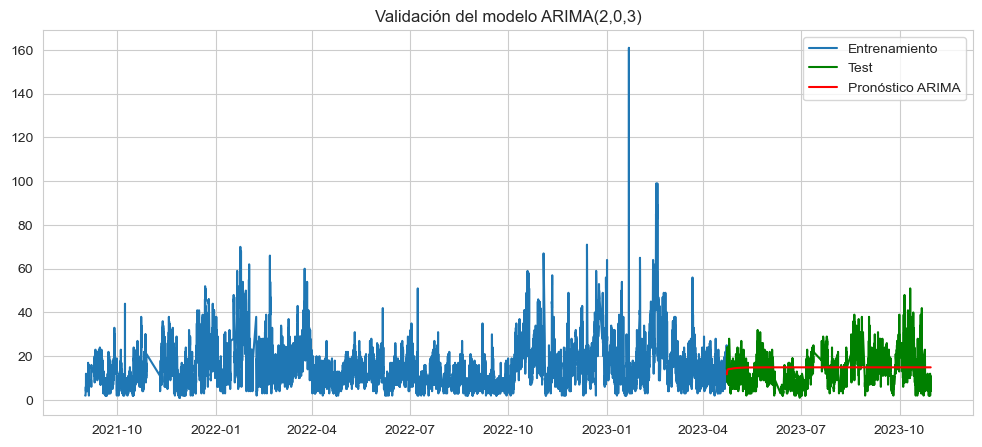

In [104]:
plt.figure(figsize=(12,5))
plt.plot(train_data.index, train_data, label='Entrenamiento')
plt.plot(test_data.index, test_data, label='Test', color='green')
plt.plot(forecast.index, forecast, label='Pronóstico ARIMA', color='red')
plt.legend()
plt.title(f"Validación del modelo ARIMA({aic_values_sorted[0][0][0]},{aic_values_sorted[0][0][1]},{aic_values_sorted[0][0][2]})")
plt.show()

**<u>Interpretación resultados</u>.-**

Por desgracia como se observa en la gráfica el modelo no es capaz de predecir el los valores correctamente ya que practicamente representa una linea recta probablemente en la media de los valores del test.

In [105]:
start = len(train_data)
end = start + len(test_data) - 1

forecast = best_model.predict(start=start, end=end, dynamic=False)

# Asegurar que forecast y test tengan el mismo índice
forecast.index = test_data.index
# Calcular los residuos
residuals = test_data - forecast

# Crear un DataFrame para visualizar
df_resid = pd.DataFrame({
    'real': test_data,
    'pred': forecast,
    'residual': residuals
})

print(df_resid.head())

                     real       pred  residual
Date                                          
2023-04-22 21:00:00  20.0  11.725064  8.274936
2023-04-22 22:00:00  14.0  12.079514  1.920486
2023-04-22 23:00:00  17.0  12.314353  4.685647
2023-04-23 00:00:00  16.0  12.520881  3.479119
2023-04-23 01:00:00  16.0  12.702604  3.297396


c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ergio\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


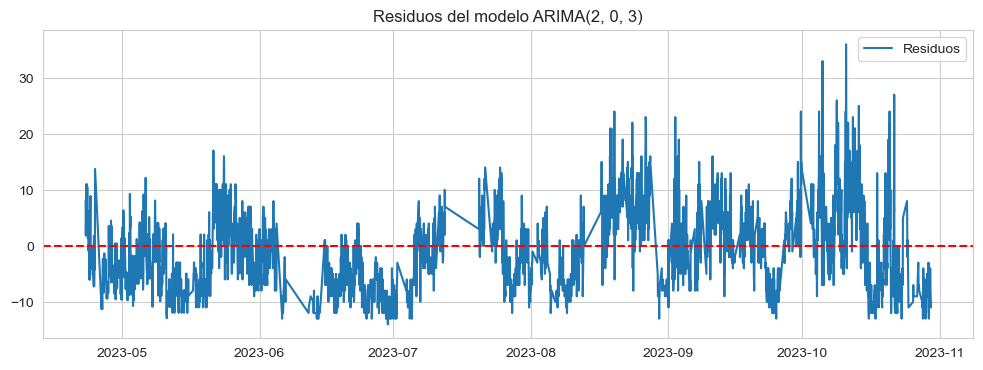

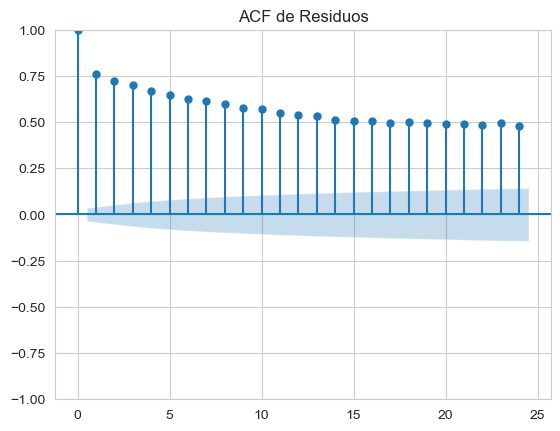

In [106]:
plt.figure(figsize=(12,4))
plt.plot(residuals, label='Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.title(f"Residuos del modelo ARIMA{best_order}")
plt.legend()
plt.show()

# ACF de los residuos
plot_acf(residuals, lags=24, title="ACF de Residuos")
plt.show()

**<u>Interpretación resultados</u>.-**

Al analizar la serie de residuos, se observa que durante algunos periodos permanecen cerca de cero, mientras que en otros presentan múltiples picos indicando una gran variabilidad. Esto sugiere que el modelo no captura completamente ciertos patrones de la concentración de PM2.5 en el aire, posiblemente relacionados con efectos estacionales o con variables meteorológicas.

Respecto al ACF de los residuos muestra autocorrelaciones significativas en muchos lags, sin acercarse al corte. Esto indica que los residuos no son del tipo ruido blanco, lo cual es una señal clara de que el modelo ARIMA no explica la estructura temporal de la concentración de PM2.5 en el aire.

Las evidencias sugieren que el modelo ARIMA(2,0,3) resulta insuficiente pese a ser el mejor modelo encontrado.